In [ ]:
# Library load
import pandas as pd
import numpy as np

# Plotting library
import seaborn as sn
import matplotlib.pyplot as plt

# Funciones para hacer cálculo estadístico
import statsmodels.api as sm
from statsmodels.formula.api import ols

# sklearn packages
from sklearn.preprocessing import StandardScaler # Escalamiento de los datos
from sklearn.decomposition import PCA # Para hacer un PCA
from sklearn.pipeline import make_pipeline # Para hacer pipelines
from sklearn import metrics # Calcula métricas para un modelo
from sklearn.tree import DecisionTreeRegressor # Generación de modelos de decision tree
from sklearn.ensemble import BaggingRegressor # Generación de modelos de bagging
from sklearn.ensemble import RandomForestRegressor # Generación de modelo de random forest
from sklearn.model_selection import train_test_split # Hace split entre training y testing
from sklearn.model_selection import cross_validate # trains model with cross validation
from sklearn.model_selection import GridSearchCV # Optimización de hiperparámetros para un modelo
# Importando la librería necesaria para OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Ignoring warning messages
import warnings
warnings.filterwarnings('ignore') #ignora los errores en el notebook

# Parte 1

# Análisis Exploratorio y Limpieza de Instancias

El análisis exploratorio es crucial para comprender los datos con los que trabajamos y prepararlos adecuadamente para la modelación predictiva. En este caso, nuestro objetivo es predecir el precio de alquiler por metro cuadrado, una variable que evita que la dimensión de la propiedad sesgue el precio total del alquiler.

## Estadística Descriptiva y Calidad General de los Datos

Comenzamos con un análisis estadístico descriptivo para resumir las características principales del conjunto de datos, observando medidas como la media, mediana, desviación estándar y rangos de las variables numéricas. También realizamos una evaluación de la calidad de los datos, identificando y tratando los valores perdidos y atípicos.

## Visualizaciones para la Distribución de Variables y Categorías

Mediante gráficos de barras, histogramas y diagramas de caja, ilustramos la distribución de variables tanto numéricas como categóricas. Estas visualizaciones nos permiten detectar patrones, distribuciones sesgadas y potenciales errores en los datos.

## Visualizaciones para la Relación entre Atributos y Precio de Alquiler por Metro Cuadrado

Usamos diagramas de dispersión y mapas de calor para entender cómo las diferentes características se relacionan con la variable objetivo. A través de estas visualizaciones, es posible capturar relaciones lineales o no lineales y la fuerza de la asociación entre variables.

## Análisis Estadísticos para la Comprensión de la Relación

Aplicamos técnicas como el Análisis de Componentes Principales (PCA), ANOVA y análisis de correlación para explorar la estructura subyacente de los datos y la interacción entre variables.

## Resumen de Conclusiones

- **Tamaño de la Vivienda:** Confirmamos que el tamaño de la vivienda es un predictor significativo del precio de alquiler, pero al convertir esta variable a precio de alquiler por metro cuadrado, esperamos dar una oportunidad equitativa a otras características para que contribuyan al modelo predictivo.
- **Relaciones con la Variable Objetivo:** Descubrimos que, además de la superficie en metros cuadrados, otros factores como la ubicación y las comodidades de la vivienda (por ejemplo, si tiene ascensor o no) tienen un impacto notable en el precio por metro cuadrado.
- **Calidad de los Datos:** Los datos son en general de alta calidad, con pocas instancias de valores atípicos o perdidos. Donde se encontraron, se tomaron medidas adecuadas para su tratamiento.
- **Visualizaciones Clave:** Las visualizaciones nos permitieron identificar grupos de viviendas que podrían tener características únicas, lo que sugiere la posibilidad de modelar subgrupos dentro del mercado más amplio.

En el siguiente paso del análisis, nos centraremos en el desarrollo y afinación de modelos predictivos que incorporan estas percepciones.


## 1. Cargar el Dataset y Creacion nuevas variables


#### Creación de Nueva Variable Objetivo y Normalización de Variables

Nuestro objetivo es desarrollar un modelo predictivo que estime el precio de alquiler por metro cuadrado de las propiedades. Este enfoque nos permitirá evaluar de manera más justa el valor del alquiler independientemente del tamaño de la propiedad.

##### Nueva Variable Objetivo: Precio por Metro Cuadrado

Para alinear nuestro modelo con este objetivo, hemos creado una nueva variable llamada `price_per_sq_meter`, que representa el precio de alquiler por metro cuadrado. Esto se logra dividiendo el precio de alquiler total (`price`) entre los metros cuadrados construidos (`sq_meters_built`).

##### Normalización de Variables

Además, hemos normalizado las variables que se relacionan con el tamaño de las viviendas para que sean proporcionales a los metros cuadrados. Estas variables incluyen el número de habitaciones (`rooms`) y el número de baños (`bathrooms`). Las nuevas variables normalizadas son `rooms_per_sq_meter` y `bathrooms_per_sq_meter`, que se calculan dividiendo el número de habitaciones y baños respectivamente por los metros cuadrados construidos.



In [ ]:
raw_data = pd.read_csv('0_processed_renting_Barcelona.csv', delimiter = ',')

# Crear la nueva variable objetivo: precio por metro cuadrado (price per square meter)
raw_data['price_per_sq_meter'] = raw_data['price'] / raw_data['sq_meters_built']

# Normalización de variables relacionadas con los metros cuadrados
raw_data['rooms_per_sq_meter'] = raw_data['rooms'] / raw_data['sq_meters_built']
raw_data['bathrooms_per_sq_meter'] = raw_data['bathrooms'] / raw_data['sq_meters_built']

# Mostrar las primeras filas del dataframe con las nuevas columnas
raw_data.head()

id  price currency   latitude  longitude  sq_meters  sq_meters_built  \
0  536625    850    €/mes  41.401708   2.154077       52.0               55   
1  545910    725    €/mes  41.407221   2.135569       32.0               37   
2  570697    950    €/mes  41.411508   2.164608        NaN               72   
3  591588    750    €/mes  41.402256   2.140764        NaN               45   
4  610243    990    €/mes  41.405327   2.146929        NaN               45   

   rooms  bathrooms  balcony  ...  garage  property_type garden  \
0      2          1      NaN  ...     NaN           piso    NaN   
1      2          1      1.0  ...     NaN           piso    NaN   
2      3          1      NaN  ...     NaN           piso    NaN   
3      1          1      1.0  ...     NaN           piso    NaN   
4      1          1      NaN  ...     NaN           piso    NaN   

   closest_station  dist_closest_station       created_at        last_seen  \
0          Fontana              0.094111   9/1/2021 15:58   10/4/2021 6:01   
1        Vallcarca              0.902561   9/2/2021 15:24   9/8/2021 12:29   
2         Alfons X              0.188177  8/28/2021 23:52  8/28/2021 23:52   
3          Lesseps              0.892917  8/29/2021 11:25   9/8/2021 12:29   
4          Lesseps              0.293784  8/30/2021 13:48  8/30/2021 14:04   

   price_per_sq_meter  rooms_per_sq_meter bathrooms_per_sq_meter  
0           15.454545            0.036364               0.018182  
1           19.594595            0.054054               0.027027  
2           13.194444            0.041667               0.013889  
3           16.666667            0.022222               0.022222  
4           22.000000            0.022222               0.022222  

[5 rows x 36 columns]

### 1.1 - Estadística descriptiva

In [ ]:
# Visualización de las primeras filas para tener una idea de los datos
print(raw_data.head())


       id  price currency   latitude  longitude  sq_meters  sq_meters_built  \
0  536625    850    €/mes  41.401708   2.154077       52.0               55   
1  545910    725    €/mes  41.407221   2.135569       32.0               37   
2  570697    950    €/mes  41.411508   2.164608        NaN               72   
3  591588    750    €/mes  41.402256   2.140764        NaN               45   
4  610243    990    €/mes  41.405327   2.146929        NaN               45   

   rooms  bathrooms  balcony  ...  garage  property_type garden  \
0      2          1      NaN  ...     NaN           piso    NaN   
1      2          1      1.0  ...     NaN           piso    NaN   
2      3          1      NaN  ...     NaN           piso    NaN   
3      1          1      1.0  ...     NaN           piso    NaN   
4      1          1      NaN  ...     NaN           piso    NaN   

   closest_station  dist_closest_station       created_at        last_seen  \
0          Fontana              0.094111   9

In [ ]:

# Resumen estadístico de los datos numéricos
print(raw_data.describe())

                 id         price     latitude    longitude    sq_meters  \
count  8.502000e+03   8502.000000  8502.000000  8502.000000  4967.000000   
mean   8.852101e+07   1117.482828    41.398106     2.162651    65.191464   
std    1.781127e+07   1010.198242     0.018344     0.020805    40.805539   
min    5.366250e+05    365.000000    41.353583     2.102393     3.000000   
25%    9.235744e+07    768.250000    41.382177     2.146160    45.000000   
50%    9.505698e+07    850.000000    41.397202     2.164480    58.000000   
75%    9.519903e+07   1100.000000    41.409961     2.178082    71.000000   
max    9.589512e+07  27500.000000    41.467905     2.218582   672.000000   

       sq_meters_built        rooms    bathrooms  balcony  terrace  ...  \
count      8502.000000  8502.000000  8502.000000   3485.0   1928.0  ...   
mean         72.478711     2.075394     1.265349      1.0      1.0  ...   
std          49.650215     1.155006     0.602056      0.0      0.0  ...   
min          11

In [ ]:


# Resumen de información de los datos, incluyendo tipos de datos y valores nulos
print(raw_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8502 entries, 0 to 8501
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      8502 non-null   int64  
 1   price                   8502 non-null   int64  
 2   currency                8502 non-null   object 
 3   latitude                8502 non-null   float64
 4   longitude               8502 non-null   float64
 5   sq_meters               4967 non-null   float64
 6   sq_meters_built         8502 non-null   int64  
 7   rooms                   8502 non-null   int64  
 8   bathrooms               8502 non-null   int64  
 9   balcony                 3485 non-null   float64
 10  terrace                 1928 non-null   float64
 11  exterior                7836 non-null   float64
 12  orientation             3686 non-null   object 
 13  floor                   6536 non-null   float64
 14  rooftop                 617 non-null    

In [ ]:

# Conteo de valores nulos
print(raw_data.isnull().sum())


id                           0
price                        0
currency                     0
latitude                     0
longitude                    0
sq_meters                 3535
sq_meters_built              0
rooms                        0
bathrooms                    0
balcony                   5017
terrace                   6574
exterior                   666
orientation               4816
floor                     1966
rooftop                   7885
elevator                   257
doorman                   8502
pool                      8181
ac                        4416
heating                   3030
year_built                4496
quality                      0
city                         0
neighborhood                 0
dist_city_center             0
furniture                 1252
garage                    8117
property_type                2
garden                    8451
closest_station              0
dist_closest_station         0
created_at                   0
last_see

### Calidad de Datos y Limpieza Necesaria:
- **Valores Faltantes**: Un número significativo de características presentan valores faltantes, destacando la necesidad de estrategias de imputación o eliminación. Particularmente, sq_meters, balcony, terrace, doorman, pool, ac, year_built, furniture, garage, y garden requieren atención.
- **Características Binarias**: Algunas variables como balcony, terrace, pool, ac, furniture, garage, y garden parecen ser binarias, registradas solo cuando están presentes.

### Distribución de Variables y Posibles Outliers:
- **Precio (price)**: El precio de alquiler muestra una amplia variabilidad con un promedio de aproximadamente 1117.48 y una desviación estándar de 1010.20. El precio máximo de 27,500 sugiere la existencia de posibles outliers o casas extremendamente lujozas, habría que mirarlo con cuidado.
- **Tamaño de Propiedad (sq_meters y sq_meters_built)**: Existe una gran variación en el tamaño de las propiedades, con un promedio de 65.19 metros cuadrados. La presencia de propiedades extremadamente grandes o pequeñas podría indicar outliers o necesitar una validación adicional.
- **Antigüedad de Propiedad (year_built)**: La antigüedad promedio es de 1950, pero la presencia de un año de construcción de **2106** es claramente un error y necesita corrección.

### Ubicación y Accesibilidad:
- Las propiedades tienden a estar relativamente cerca del centro de la ciudad (promedio de 2.62 km) y de la estación de metro más cercana (promedio de 0.39 km), indicando una buena ubicación en términos de accesibilidad.

### Conclusiones Preliminares:
Este análisis subraya la importancia de una cuidadosa limpieza y preparación de datos antes de proceder con el modelado predictivo. La variabilidad en características clave y la presencia de valores atípicos y faltantes sugieren que se debe proceder con cautela. La limpieza de datos y la imputación adecuada serán pasos cruciales para garantizar la fiabilidad de cualquier análisis posterior o modelos predictivos derivados de este conjunto de datos.onjunto de datos.


In [ ]:
print("Número total de registros después de la carga:", raw_data.shape[0])


Número total de registros después de la carga: 8502


Para realizar un análisis efectivo y construir modelos de machine learning precisos, es crucial seleccionar las variables más relevantes y representativas del conjunto de datos. En este caso, hemos elegido mantener una serie de variables que consideramos importantes en base al **Working Lab** para comprender y predecir el precio de alquiler de las viviendas en Barcelona. Además de las características básicas de las propiedades, como la superficie construida, el número de habitaciones y baños, y la presencia de comodidades como balcón, terraza, ascensor y piscina, hemos introducido tres nuevas variables derivadas para refinar aún más nuestro análisis:

1. **Precio por metro cuadrado (price_per_sq_meter)**: Esta variable permite normalizar el precio del alquiler en función del tamaño de la vivienda, ofreciendo una métrica de comparación más justa entre propiedades de diferentes tamaños.
2. **Habitaciones por metro cuadrado (rooms_per_sq_meter)**: Al normalizar el número de habitaciones por el tamaño de la vivienda, podemos obtener una idea más clara de la distribución del espacio y la densidad habitacional.
3. **Baños por metro cuadrado (bathrooms_per_sq_meter)**: Similar a las habitaciones por metro cuadrado, esta variable ofrece una perspectiva sobre la proporción de baños en relación con el tamaño de la vivienda.

Al incluir estas variables normalizadas, buscamos mejorar la calidad de nuestro análisis y los modelos predictivos, centrándonos en las características que pueden influir significativamente en el precio de alquiler y proporcionando una comparación más equitativa entre las propiedades. Esto nos permitirá obtener insights más profundos y generar predicciones más precisas sobre el mercado inmobiliario de Barcelona.elona.

In [ ]:
# Mantener solo las variables seleccionadas, incluyendo las nuevas variables
columns_to_keep = [
    'price_per_sq_meter', 'sq_meters_built', 'rooms_per_sq_meter', 'bathrooms_per_sq_meter',
    'balcony', 'terrace', 'exterior', 'orientation', 'floor', 'rooftop', 'elevator', 'pool', 'ac',
    'heating', 'year_built', 'neighborhood', 'dist_city_center', 'property_type',
    'dist_closest_station', 'furniture'
]

# Actualizar el DataFrame manteniendo solo las columnas seleccionadas
rent_dataset = raw_data[columns_to_keep]

# Verificar el DataFrame resultante
rent_dataset.head()



price_per_sq_meter  sq_meters_built  rooms_per_sq_meter  \
0           15.454545               55            0.036364   
1           19.594595               37            0.054054   
2           13.194444               72            0.041667   
3           16.666667               45            0.022222   
4           22.000000               45            0.022222   

   bathrooms_per_sq_meter  balcony  terrace  exterior orientation  floor  \
0                0.018182      NaN      NaN       1.0       norte    2.0   
1                0.027027      1.0      NaN       1.0         sur    3.0   
2                0.013889      NaN      NaN       1.0         NaN    4.0   
3                0.022222      1.0      NaN       1.0       norte    4.0   
4                0.022222      NaN      NaN       1.0         sur    3.0   

   rooftop  elevator  pool   ac heating  year_built  \
0      NaN       0.0   NaN  1.0     NaN         NaN   
1      NaN       1.0   NaN  1.0     NaN      1962.0   
2      NaN       1.0   NaN  1.0     NaN         NaN   
3      NaN       1.0   NaN  NaN     NaN      1936.0   
4      NaN       1.0   NaN  NaN     gas         NaN   

                 neighborhood  dist_city_center property_type  \
0                      Gràcia          2.026455          piso   
1  Sant Gervasi - La Bonanova          3.582409          piso   
2            El Baix Guinardó          2.663025          piso   
3  Sant Gervasi - La Bonanova          2.910067          piso   
4         Sarrià-Sant Gervasi          2.727149          piso   

   dist_closest_station  furniture  
0              0.094111        3.0  
1              0.902561        NaN  
2              0.188177        3.0  
3              0.892917        3.0  
4              0.293784        3.0

El siguiente método es útil especialmente para características donde la ausencia de un valor puede interpretarse razonablemente como un "0", indicando la falta de esa característica o servicio en la propiedad. Es un enfoque común para las características binarias o de tipo "sí/no".

In [ ]:
# Asegurándonos de que 'rent_dataset' es una copia independiente de 'raw_data'
rent_dataset = raw_data[columns_to_keep].copy()

# Lista de características para las cuales los valores nulos se pueden asumir como 0
features_to_fill_with_zero = ['balcony', 'terrace', 'exterior', 'floor', 'rooftop', 'elevator', 'pool', 'ac', 'heating']

# Rellenar los valores nulos con 0 para las características seleccionadas
for feature in features_to_fill_with_zero:
    rent_dataset[feature].fillna(0, inplace=True)

# Verificar el DataFrame resultante
rent_dataset.head()



price_per_sq_meter  sq_meters_built  rooms_per_sq_meter  \
0           15.454545               55            0.036364   
1           19.594595               37            0.054054   
2           13.194444               72            0.041667   
3           16.666667               45            0.022222   
4           22.000000               45            0.022222   

   bathrooms_per_sq_meter  balcony  terrace  exterior orientation  floor  \
0                0.018182      0.0      0.0       1.0       norte    2.0   
1                0.027027      1.0      0.0       1.0         sur    3.0   
2                0.013889      0.0      0.0       1.0         NaN    4.0   
3                0.022222      1.0      0.0       1.0       norte    4.0   
4                0.022222      0.0      0.0       1.0         sur    3.0   

   rooftop  elevator  pool   ac heating  year_built  \
0      0.0       0.0   0.0  1.0       0         NaN   
1      0.0       1.0   0.0  1.0       0      1962.0   
2      0.0       1.0   0.0  1.0       0         NaN   
3      0.0       1.0   0.0  0.0       0      1936.0   
4      0.0       1.0   0.0  0.0     gas         NaN   

                 neighborhood  dist_city_center property_type  \
0                      Gràcia          2.026455          piso   
1  Sant Gervasi - La Bonanova          3.582409          piso   
2            El Baix Guinardó          2.663025          piso   
3  Sant Gervasi - La Bonanova          2.910067          piso   
4         Sarrià-Sant Gervasi          2.727149          piso   

   dist_closest_station  furniture  
0              0.094111        3.0  
1              0.902561        NaN  
2              0.188177        3.0  
3              0.892917        3.0  
4              0.293784        3.0

#### Remplazar fila de Años de Construcción Futuros (1)

En el proceso de limpieza y preparación de nuestro conjunto de datos, hemos identificado la presencia de valores anómalos en la columna year_built, específicamente años de construcción que se extienden hasta el futuro (Una vivienda es del año 2106). Dado que estos valores no son posibles en el contexto real de propiedades existentes, su presencia indica claramente errores de entrada de datos, por lo que decidimos reemplazarlo para mantener la integridad de los datos y el impacto estadistico.



In [ ]:
from datetime import datetime

# Obtener el año actual
current_year = datetime.now().year

# Mostrar filas con 'year_built' en el futuro
rent_dataset[rent_dataset['year_built'] > current_year]


price_per_sq_meter  sq_meters_built  rooms_per_sq_meter  \
1422           26.190476               42             0.02381   

      bathrooms_per_sq_meter  balcony  terrace  exterior orientation  floor  \
1422                 0.02381      1.0      0.0       1.0         sur    2.0   

      rooftop  elevator  pool   ac heating  year_built    neighborhood  \
1422      0.0       1.0   0.0  1.0     gas      2106.0  La Barceloneta   

      dist_city_center property_type  dist_closest_station  furniture  
1422          1.725165          piso              0.311735        3.0

In [ ]:
# Contar filas con 'year_built' en el futuro
future_year_built_count = rent_dataset[rent_dataset['year_built'] > current_year].shape[0]
print(f"Número de filas con 'year_built' en el futuro: {future_year_built_count}")


Número de filas con 'year_built' en el futuro: 1


In [ ]:


# Reemplazar años de construcción en el futuro con el año actual
rent_dataset.loc[rent_dataset['year_built'] > current_year, 'year_built'] = current_year



In [ ]:
# Calcular la edad de la propiedad usando el año actual
rent_dataset['property_age'] = current_year - rent_dataset['year_built']


Para obtener una estimación más actualizada y relevante de la edad de las propiedades en nuestro conjunto de datos, hemos optado por utilizar el año actual como punto de referencia para nuestros cálculos. Esto asegura que nuestras estimaciones de edad sean lo más precisas y útiles posible, independientemente de cuándo se realice el análisis.


In [ ]:
rent_dataset.head()

price_per_sq_meter  sq_meters_built  rooms_per_sq_meter  \
0           15.454545               55            0.036364   
1           19.594595               37            0.054054   
2           13.194444               72            0.041667   
3           16.666667               45            0.022222   
4           22.000000               45            0.022222   

   bathrooms_per_sq_meter  balcony  terrace  exterior orientation  floor  \
0                0.018182      0.0      0.0       1.0       norte    2.0   
1                0.027027      1.0      0.0       1.0         sur    3.0   
2                0.013889      0.0      0.0       1.0         NaN    4.0   
3                0.022222      1.0      0.0       1.0       norte    4.0   
4                0.022222      0.0      0.0       1.0         sur    3.0   

   rooftop  ...  pool   ac  heating year_built                neighborhood  \
0      0.0  ...   0.0  1.0        0        NaN                      Gràcia   
1      0.0  ...   0.0  1.0        0     1962.0  Sant Gervasi - La Bonanova   
2      0.0  ...   0.0  1.0        0        NaN            El Baix Guinardó   
3      0.0  ...   0.0  0.0        0     1936.0  Sant Gervasi - La Bonanova   
4      0.0  ...   0.0  0.0      gas        NaN         Sarrià-Sant Gervasi   

  dist_city_center  property_type dist_closest_station  furniture  \
0         2.026455           piso             0.094111        3.0   
1         3.582409           piso             0.902561        NaN   
2         2.663025           piso             0.188177        3.0   
3         2.910067           piso             0.892917        3.0   
4         2.727149           piso             0.293784        3.0   

   property_age  
0           NaN  
1          62.0  
2           NaN  
3          88.0  
4           NaN  

[5 rows x 21 columns]

En este paso, hemos abordado una cuestión importante relacionada con la variable year_built, que indica el año de construcción de las propiedades. Al revisar los datos, nos dimos cuenta de la existencia de valores futuros, lo cual es ilógico y podría afectar negativamente la calidad del análisis y los modelos predictivos. Para resolver este problema, adoptamos el siguiente enfoque:

1. **Identificación de registros problemáticos**: Hemos filtrado aquellas filas en las que el año de construcción es mayor al año actual, lo cual no tiene sentido desde un punto de vista práctico y lógico.

2. **Corrección de datos incorrectos**: Para las propiedades con un year_built situado en el futuro, hemos optado por reemplazar estos valores por el año actual, asumiendo que la fecha más plausible para una construcción futura incorrectamente registrada es el año en curso.

3. **Cálculo de la edad de la propiedad**: Con el objetivo de generar una variable que pueda ser más significativa para el análisis, hemos calculado la edad de cada propiedad restando el año de construcción del año actual. Esto nos proporciona una nueva métrica, property_age, que refleja la antigüedad de la vivienda y puede influir en su valor de mercado y atractivo para los inquilinos o compradores.

Este proceso de limpieza y transformación de datos no solo mejora la precisión de nuestro conjunto de datos sino que también enriquece el análisis con una variable adicional que podría revelar insights valiosos sobre cómo la antigüedad de las propiedades afecta a su precio de alquiler en Barcelona.

In [ ]:
print("Número total de registros después de la carga:", rent_dataset.shape[0])


Número total de registros después de la carga: 8502


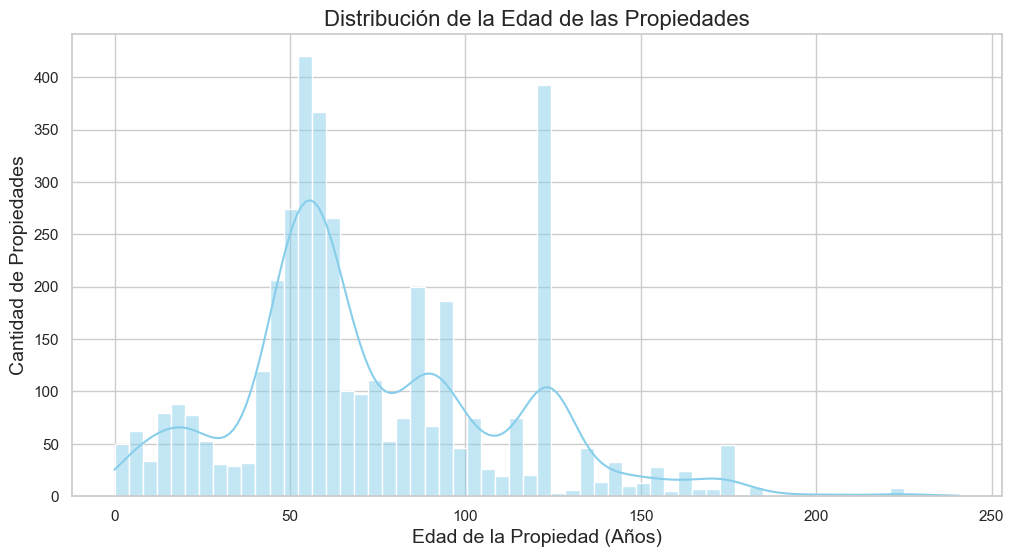

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo Seaborn
sns.set(style="whitegrid")

# Crear el histograma
plt.figure(figsize=(12, 6))  # Configurar el tamaño del gráfico
sns.histplot(rent_dataset['property_age'], bins=60, kde=True, color="skyblue")  # kde=True agrega una línea de densidad del Kernel

# Añadir títulos y etiquetas
plt.title('Distribución de la Edad de las Propiedades', fontsize=16)
plt.xlabel('Edad de la Propiedad (Años)', fontsize=14)
plt.ylabel('Cantidad de Propiedades', fontsize=14)

# Mostrar el gráfico
plt.show()



La distribución de la edad de las propiedades muestra:

- Una **concentración significativa** de propiedades construidas en los últimos 100 años, con un pico alrededor de los 50 años.
- Presencia de **propiedades antiguas**, reflejando un mercado inmobiliario que incluye edificaciones históriálisis.


In [ ]:
def conditions(x):
    if x < 0:
        return "Unknown"
    elif ((x >= 0) & (x < 40)):
        return "0 - 40"
    elif ((x >= 40) & (x < 70)):
        return "40 - 70"
    elif ((x >= 70) & (x < 120)):
        return "70 - 120"
    elif ((x >= 120) & (x < 150)):
        return "120 - 150"
    elif ((x >= 150)):
        return "+150"
    else:
        return "Unknown"

func = np.vectorize(conditions)
rent_dataset['property_age_cat'] = func(rent_dataset['property_age'])
rent_dataset.head()


price_per_sq_meter  sq_meters_built  rooms_per_sq_meter  \
0           15.454545               55            0.036364   
1           19.594595               37            0.054054   
2           13.194444               72            0.041667   
3           16.666667               45            0.022222   
4           22.000000               45            0.022222   

   bathrooms_per_sq_meter  balcony  terrace  exterior orientation  floor  \
0                0.018182      0.0      0.0       1.0       norte    2.0   
1                0.027027      1.0      0.0       1.0         sur    3.0   
2                0.013889      0.0      0.0       1.0         NaN    4.0   
3                0.022222      1.0      0.0       1.0       norte    4.0   
4                0.022222      0.0      0.0       1.0         sur    3.0   

   rooftop  ...   ac  heating  year_built                neighborhood  \
0      0.0  ...  1.0        0         NaN                      Gràcia   
1      0.0  ...  1.0        0      1962.0  Sant Gervasi - La Bonanova   
2      0.0  ...  1.0        0         NaN            El Baix Guinardó   
3      0.0  ...  0.0        0      1936.0  Sant Gervasi - La Bonanova   
4      0.0  ...  0.0      gas         NaN         Sarrià-Sant Gervasi   

   dist_city_center property_type  dist_closest_station furniture  \
0          2.026455          piso              0.094111       3.0   
1          3.582409          piso              0.902561       NaN   
2          2.663025          piso              0.188177       3.0   
3          2.910067          piso              0.892917       3.0   
4          2.727149          piso              0.293784       3.0   

   property_age  property_age_cat  
0           NaN           Unknown  
1          62.0           40 - 70  
2           NaN           Unknown  
3          88.0          70 - 120  
4           NaN           Unknown  

[5 rows x 22 columns]

In [ ]:
rent_dataset = rent_dataset.drop(['year_built', 'property_age'], axis = 1)

Este paso implica la categorización de la edad de las propiedades para facilitar su análisis y visualización. Al agrupar las edades en categorías definidas, simplificamos la interpretación de los datos y posiblemente descubramos patrones más claros en la relación entre la antigüedad de una propiedad y su precio de alquiler. Aquí está el proceso detallado:
1. **Definición de Categorías**: Se han establecido varias categorías para agrupar las edades de las propiedades:
   - "0 - 40": Propiedades de hasta 40 años de antigüedad.
   - "40 - 70": Propiedades entre 40 y 70 años de antigüedad.
   - "70 - 120": Propiedades entre 70 y 120 años de antigüedad.
   - "120 - 150": Propiedades entre 120 y 150 años de antigüedad.
   - "+150": Propiedades de más de 150 años de antigüedad.
   - "Unknown": Se utiliza para las propiedades con edades negativas o datos faltantes, lo que indica un problema en los datos o un error de eda propiedad.

Este enfoque no solo nos ayuda a manejar mejor la variabilidad en las edades de las propiedades sino que también facilita la realización de análisis agrupados y la generación de insights específicos por categoría de edad, lo cual puede ser invaluable para comprender las preferencias del mercado y la valoración de propiedades en función de su antigüedad.

In [ ]:

print(rent_dataset['property_age_cat'].isna().sum())

0


In [ ]:
rent_dataset.head()

price_per_sq_meter  sq_meters_built  rooms_per_sq_meter  \
0           15.454545               55            0.036364   
1           19.594595               37            0.054054   
2           13.194444               72            0.041667   
3           16.666667               45            0.022222   
4           22.000000               45            0.022222   

   bathrooms_per_sq_meter  balcony  terrace  exterior orientation  floor  \
0                0.018182      0.0      0.0       1.0       norte    2.0   
1                0.027027      1.0      0.0       1.0         sur    3.0   
2                0.013889      0.0      0.0       1.0         NaN    4.0   
3                0.022222      1.0      0.0       1.0       norte    4.0   
4                0.022222      0.0      0.0       1.0         sur    3.0   

   rooftop  elevator  pool   ac heating                neighborhood  \
0      0.0       0.0   0.0  1.0       0                      Gràcia   
1      0.0       1.0   0.0  1.0       0  Sant Gervasi - La Bonanova   
2      0.0       1.0   0.0  1.0       0            El Baix Guinardó   
3      0.0       1.0   0.0  0.0       0  Sant Gervasi - La Bonanova   
4      0.0       1.0   0.0  0.0     gas         Sarrià-Sant Gervasi   

   dist_city_center property_type  dist_closest_station  furniture  \
0          2.026455          piso              0.094111        3.0   
1          3.582409          piso              0.902561        NaN   
2          2.663025          piso              0.188177        3.0   
3          2.910067          piso              0.892917        3.0   
4          2.727149          piso              0.293784        3.0   

  property_age_cat  
0          Unknown  
1          40 - 70  
2          Unknown  
3         70 - 120  
4          Unknown

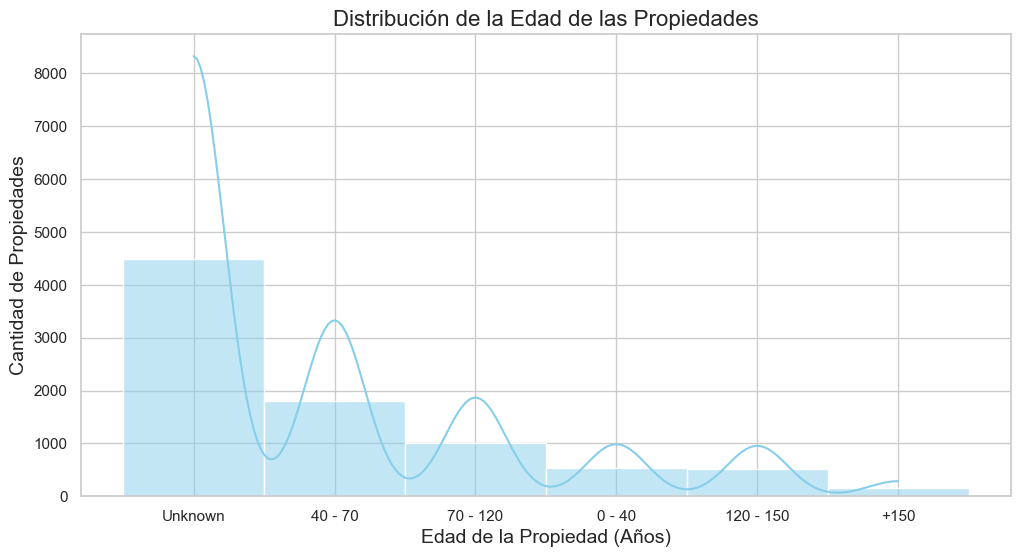

In [ ]:
# Configuración de estilo Seaborn
sns.set(style="whitegrid")

# Crear el histograma
plt.figure(figsize=(12, 6))  # Configurar el tamaño del gráfico
sns.histplot(rent_dataset['property_age_cat'], bins=60, kde=True, color="skyblue")  # kde=True agrega una línea de densidad del Kernel

# Añadir títulos y etiquetas
plt.title('Distribución de la Edad de las Propiedades', fontsize=16)
plt.xlabel('Edad de la Propiedad (Años)', fontsize=14)
plt.ylabel('Cantidad de Propiedades', fontsize=14)

# Mostrar el gráfico
plt.show()


In [ ]:
rent_dataset = rent_dataset.drop(['year_built', 'property_age'], axis=1)


KeyError: "['year_built', 'property_age'] not found in axis"

Tras la creación exitosa de la columna property_age_cat, que categoriza las edades de las propiedades en intervalos definidos, hemos decidido simplificar nuestro DataFrame eliminando las columnas year_built y property_age. La razón de este paso es doble:

- **Reducción de Redundancia**: La columna property_age_cat retiene toda la información relevante de year_built en una forma que es más útil para el análisis y el modelado. Mantener ambas columnas sería redundante y podría añadir complejidad innecesaria a los análisis posteriores.

- **Enfoque en Variables Relevantes**: Al eliminar columnas que ya no son necesarias, enfocamos la atención en las variables que serán utilizadas en el modelado predictivo o en la visualización de datos. Esto ayuda a prevenir la confusión y mejora la legibilidad del conjunto de datos.


In [ ]:
cat_features = ['neighborhood', 'property_type', 'orientation', 'heating', 'property_age_cat','furniture']
rent_dataset_numeric = rent_dataset.drop(cat_features, axis = 1)

In [ ]:
rent_dataset_numeric.isnull().sum() / len(rent_dataset_numeric)

price_per_sq_meter        0.0
sq_meters_built           0.0
rooms_per_sq_meter        0.0
bathrooms_per_sq_meter    0.0
balcony                   0.0
terrace                   0.0
exterior                  0.0
floor                     0.0
rooftop                   0.0
elevator                  0.0
pool                      0.0
ac                        0.0
dist_city_center          0.0
dist_closest_station      0.0
dtype: float64


El propósito de este fragmento de código es crear un nuevo DataFrame que contenga solo las características numéricas del conjunto de datos original rent_dataset. Se hace eliminando las características categóricas del DataFrame, ya que los modelos de aprendizaje automático suelen requerir entradas numéricas. Luego de eso comprobamos si nuestros datos no tienen nulos.

Al eliminar las variables categóricas (cat_features) de rent_dataset para crear rent_dataset_numeric, nos enfocamos en las características numéricas para el análisis y modelado subsiguiente. Este paso es importante porque los modelos de aprendizaje automático suelen requerir entradas numéricas.

# Visualizaciones que ayuden a entender la distribución de las variables y categorías

Hemos generado histogramas para cada variable numérica en nuestro conjunto de datos para visualizar sus distribuciones. Estas visualizaciones nos permiten comprender rápidamente la forma de las distribuciones de las características, identificar posibles sesgos en los datos y detectar la presencia de valores atípicos.

Este paso es crucial para guiar las decisiones de preprocesamiento, como la necesidad de normalización, estandarización o transformaciones de datos para manejar distribuciones sesgadas. Además, los histogramas son herramientas valiosas para la detección inicial de patrones o anomalías que podrían influir en la construcción y el rendimiento de los modelos de aprendizaje automático.

La siguiente serie de histogramas ilustra las distribuciones de las variables numéricas dentro de nuestro conjunto de datos:


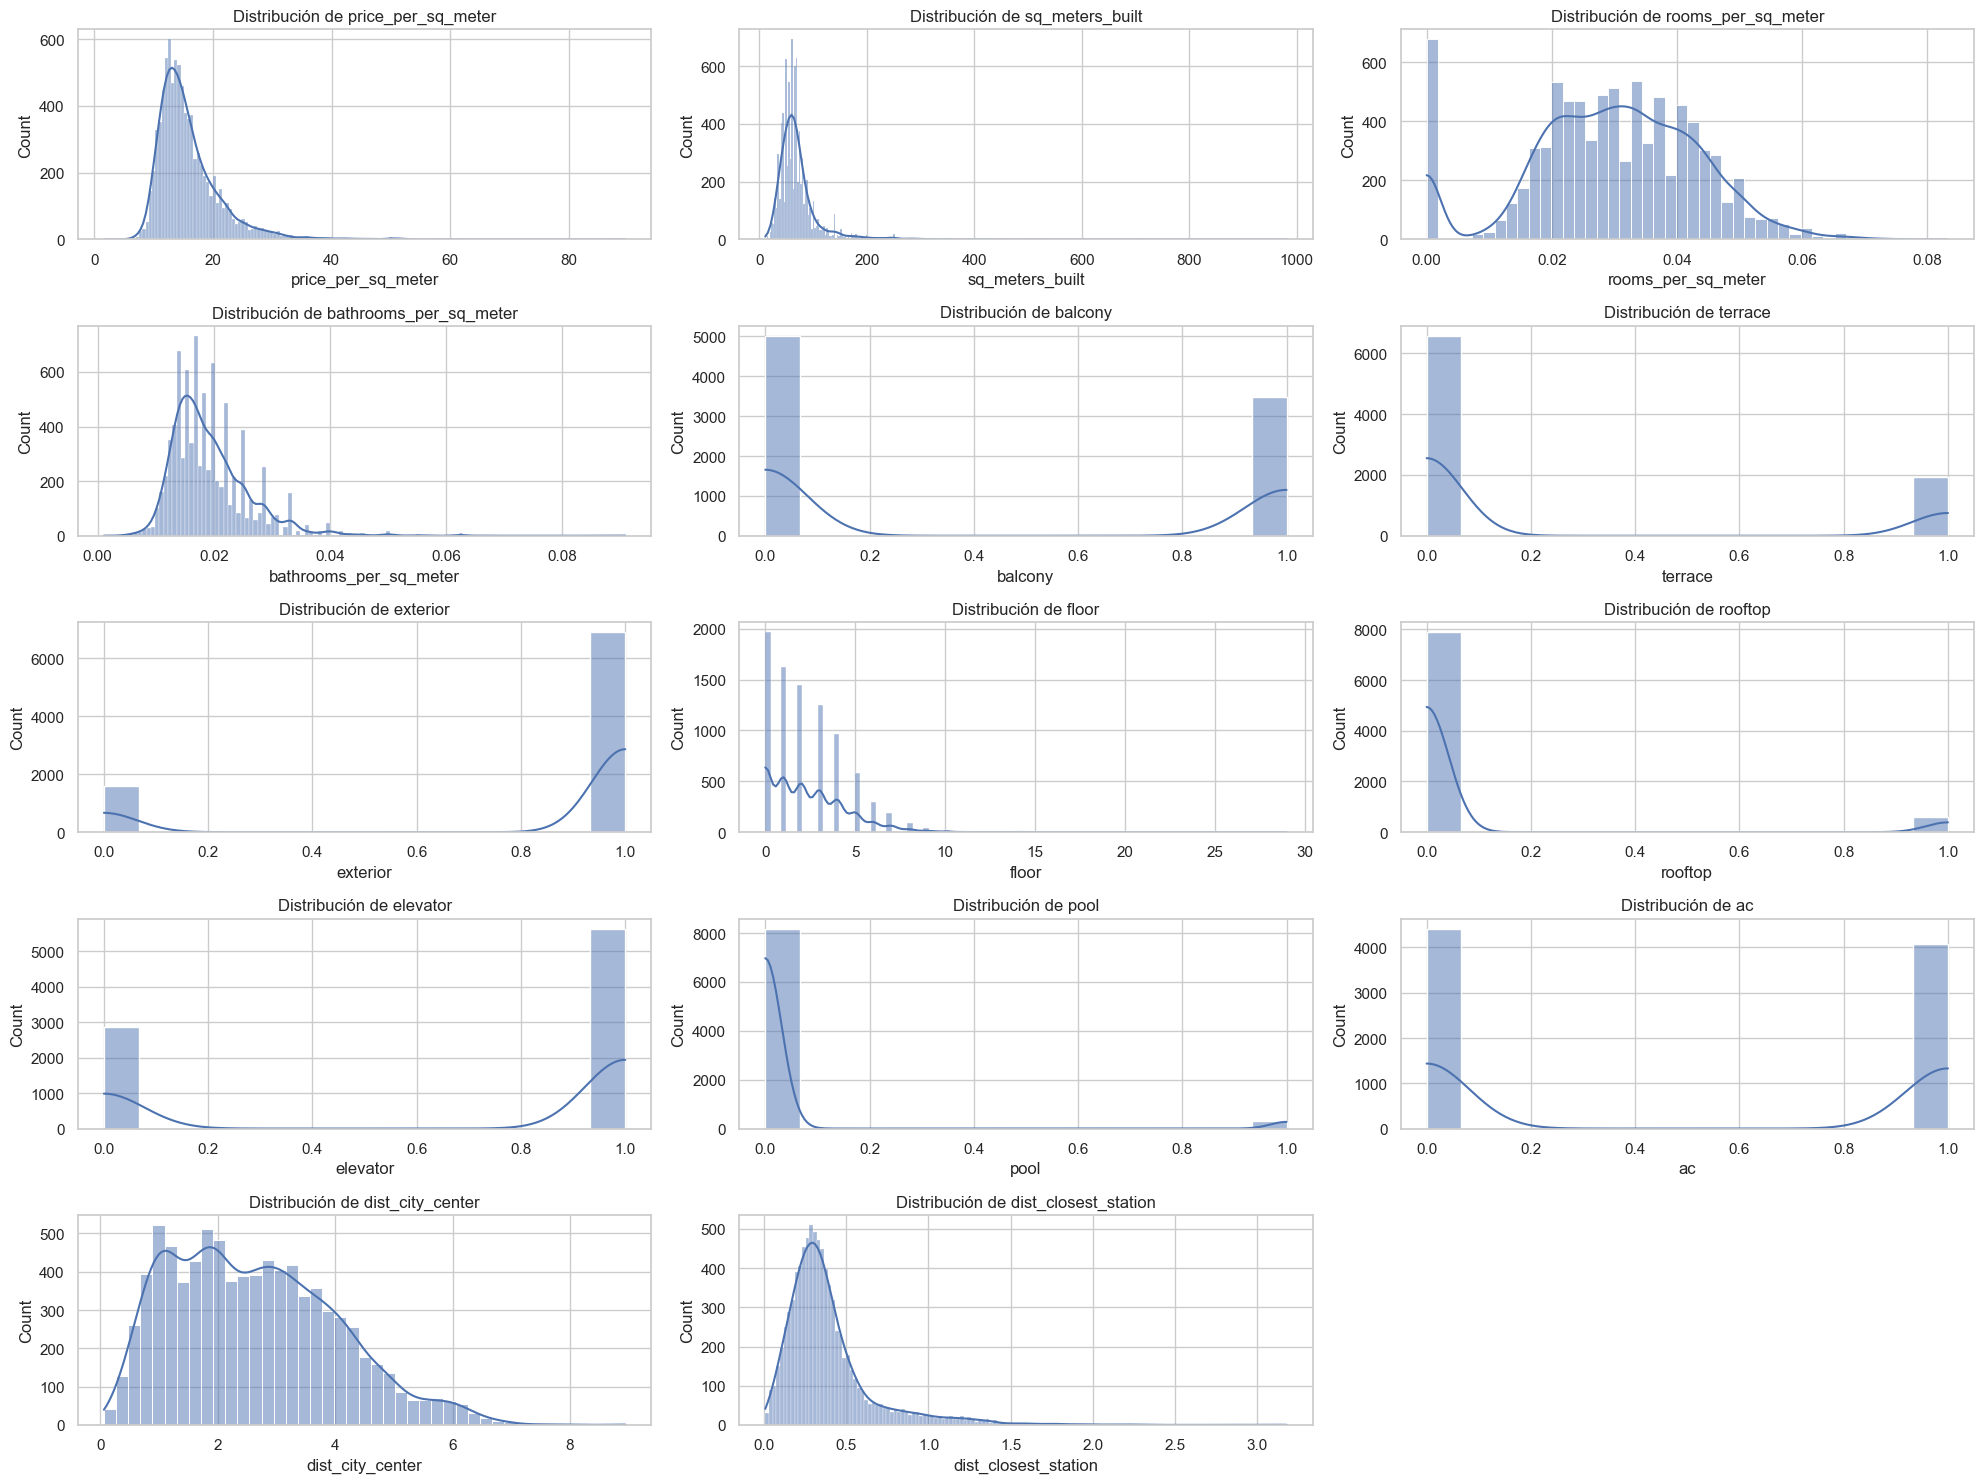

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración del estilo de los gráficos
sns.set(style="whitegrid")

# Lista de las variables numéricas
numeric_features = rent_dataset_numeric.columns

# Determinar el número de filas y columnas necesarias para los subplots
num_variables = len(numeric_features)
num_columns = 3
num_rows = num_variables // num_columns + (num_variables % num_columns > 0)

# Crear figuras para los subplots de las variables numéricas
for i, feature in enumerate(numeric_features):
    if i % (num_rows * num_columns) == 0:  # Comenzar una nueva figura si la anterior está llena
        plt.figure(figsize=(20, 15))

    plt.subplot(num_rows, num_columns, (i % (num_rows * num_columns)) + 1)
    sns.histplot(rent_dataset_numeric[feature], kde=True)
    plt.title(f'Distribución de {feature}')

    if (i % (num_rows * num_columns) == (num_rows * num_columns - 1)) or (i == num_variables - 1):
        plt.tight_layout()
        plt.show()


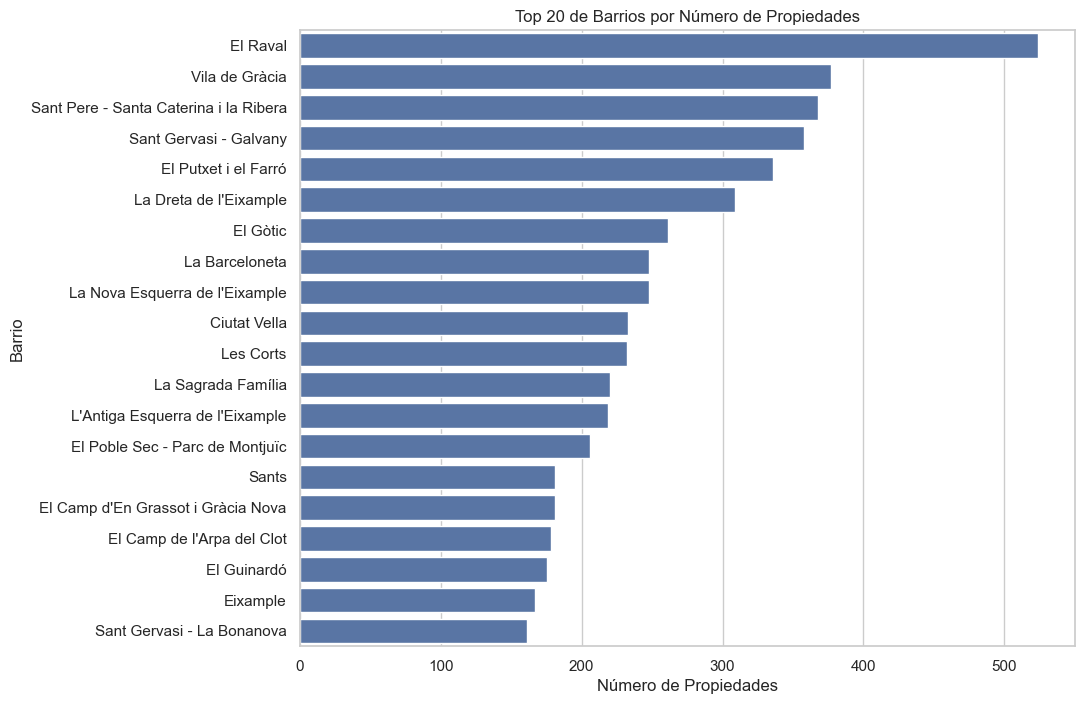

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración del estilo de los gráficos
sns.set(style="whitegrid")

# Gráficos de barras para las variables categóricas, ordenados por conteo
plt.figure(figsize=(10, 8))  # Puedes ajustar esto según la cantidad de categorías
count_series = rent_dataset['neighborhood'].value_counts()
sns.barplot(y=count_series.index, x=count_series.values, order=count_series.iloc[:20].index)  # Mostrar solo los 20 barrios más comunes
plt.title('Top 20 de Barrios por Número de Propiedades')
plt.xlabel('Número de Propiedades')
plt.ylabel('Barrio')
plt.show()


Los barrios en la parte superior del gráfico, como El Raval y Vila de Gràcia, son áreas con alta densidad de viviendas o simplemente zonas populares para alquilar. Por otro lado, los barrios hacia el final de la lista pueden ser zonas residenciales con menos densidad de población o menos demanda en el mercado de alquileres.

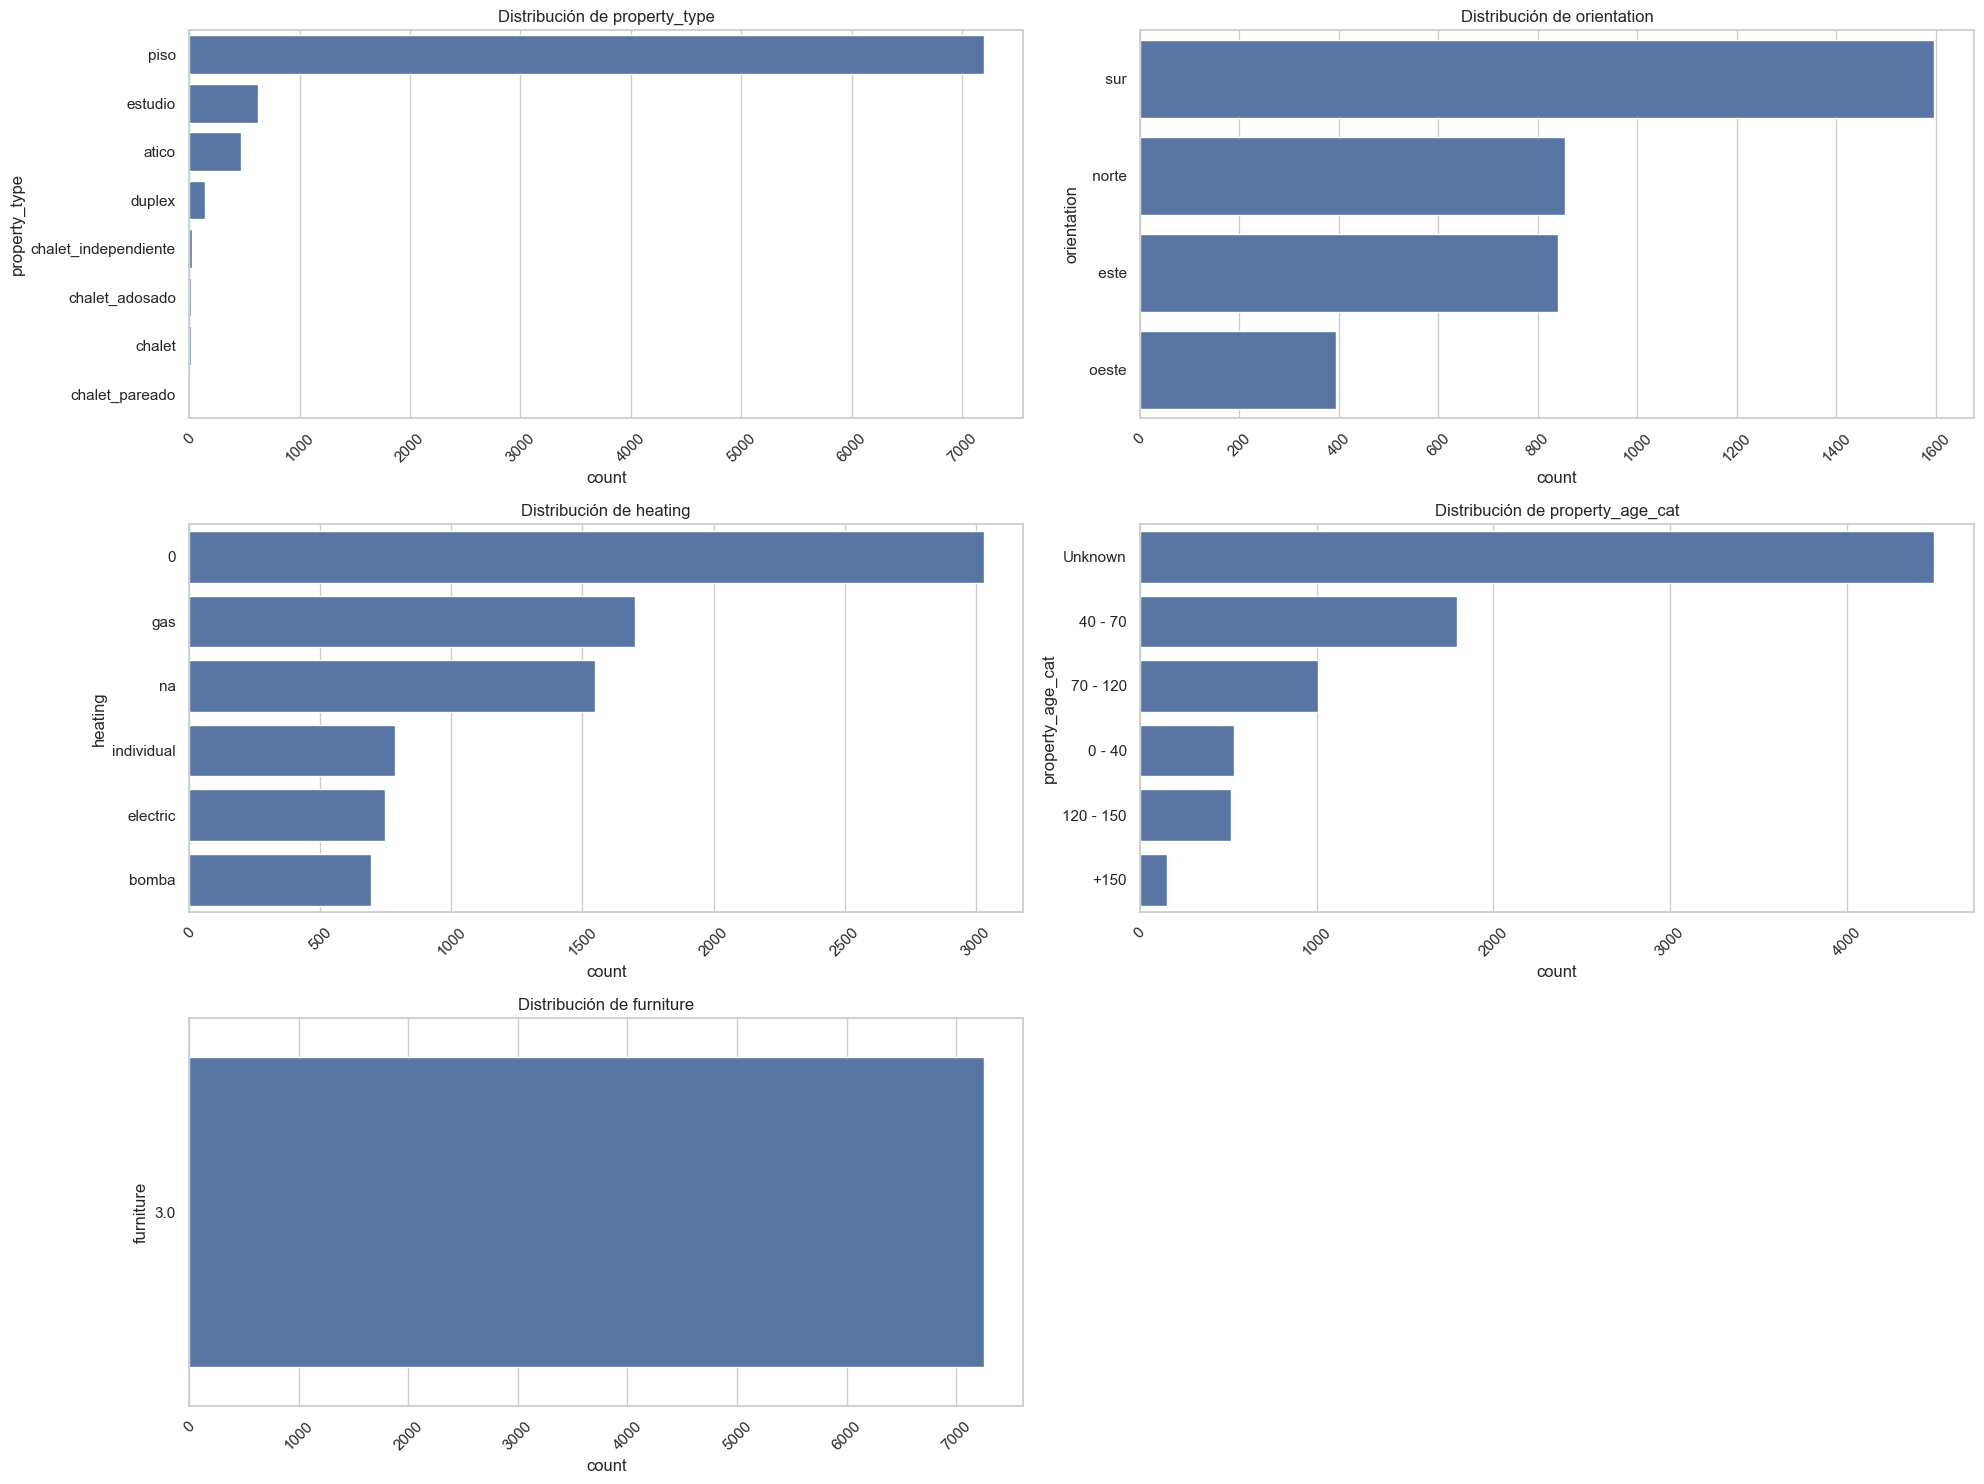

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración del estilo de los gráficos
sns.set(style="whitegrid")

# Excluir 'neighborhood' de las características categóricas a graficar
cat_features_to_plot = [feature for feature in cat_features if feature != 'neighborhood']

# Determinar el número de filas necesario para los subplots
n_rows = len(cat_features_to_plot) // 2 + len(cat_features_to_plot) % 2

# Crear gráficos de barras para las variables categóricas restantes
plt.figure(figsize=(20, n_rows * 5))  # Ajusta la altura basada en el número de filas
for i, feature in enumerate(cat_features_to_plot):
    plt.subplot(n_rows, 2, i+1)
    order = rent_dataset[feature].value_counts().index
    sns.countplot(data=rent_dataset, y=feature, order=order)
    plt.title(f'Distribución de {feature}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
# Ver los valores únicos y sus conteos para la columna 'furniture'
furniture_counts = rent_dataset['furniture'].value_counts()
print(furniture_counts)


furniture
3.0    7250
Name: count, dtype: int64


In [ ]:
# Reemplazar NaN por 0 (representando 'Sin amueblar' o 'Sin información')
rent_dataset['furniture'] = rent_dataset['furniture'].fillna(0)

# Reemplazar 3.0 por 1 para representar 'Amueblado'
rent_dataset['furniture'] = rent_dataset['furniture'].replace(3.0, 1)

# Verificar los cambios
rent_dataset['furniture'].value_counts()


furniture
1.0    7250
0.0    1252
Name: count, dtype: int64

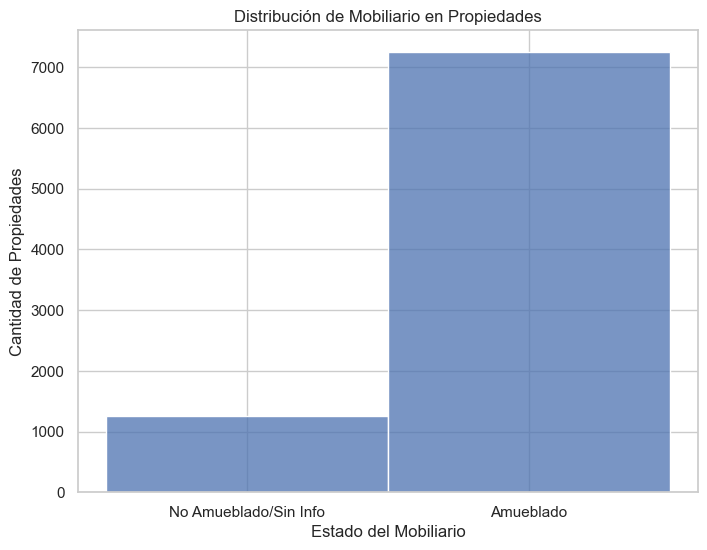

In [ ]:
# a la columna 'furniture' para que 0 represente 'No Amueblado o Sin Información' y 1 'Amueblado'.

# Configuramos el estilo de Seaborn para los gráficos
sns.set(style="whitegrid")

# Creamos el histograma para la columna 'furniture'
plt.figure(figsize=(8, 6))
sns.histplot(rent_dataset['furniture'], bins=[-0.5, 0.5, 1.5], kde=False)
plt.xticks([0, 1], ['No Amueblado/Sin Info', 'Amueblado'])
plt.title('Distribución de Mobiliario en Propiedades')
plt.xlabel('Estado del Mobiliario')
plt.ylabel('Cantidad de Propiedades')
plt.show()

En el proceso de análisis de nuestro conjunto de datos, identificamos que la columna furniture proporciona información valiosa sobre si las propiedades están amuebladas. Sin embargo, la representación original de estos datos incluía valores NaN que no contribuían a nuestro análisis y podían causar ambigüedad. Para clarificar nuestra exploración de datos y fortalecer los futuros modelos predictivos, transformamos esta característica a un formato binario.

- **Codificación Binaria**: Convertimos la característica furniture a un formato binario donde 1 indica que la propiedad está amueblada y 0 indica que la propiedad no está amueblada o falta información al respecto. Esta transformación simplifica la interpretación de la característica y la hace más manejable para los análisis estadísticos y la modelización.

- **Manejo de Valores Faltantes**: Optamos por tratar los valores faltantes (NaN) como una indicación de que una propiedad no está amueblada o que no tenemos información sobre su estado, asignándoles el valor 0. Esto nos permite mantener la integridad del conjunto de datos sin descartar registros potencialmente valiosos.


# Visualizaciones que ayuden a entender la relación entre los atributos y la variable objetivo price_per_sq_meter        

Para profundizar en nuestro entendimiento de cómo las diferentes características de las propiedades impactan en el precio de alquiler por metro cuadrado, hemos empleado una serie de visualizacionesatos:


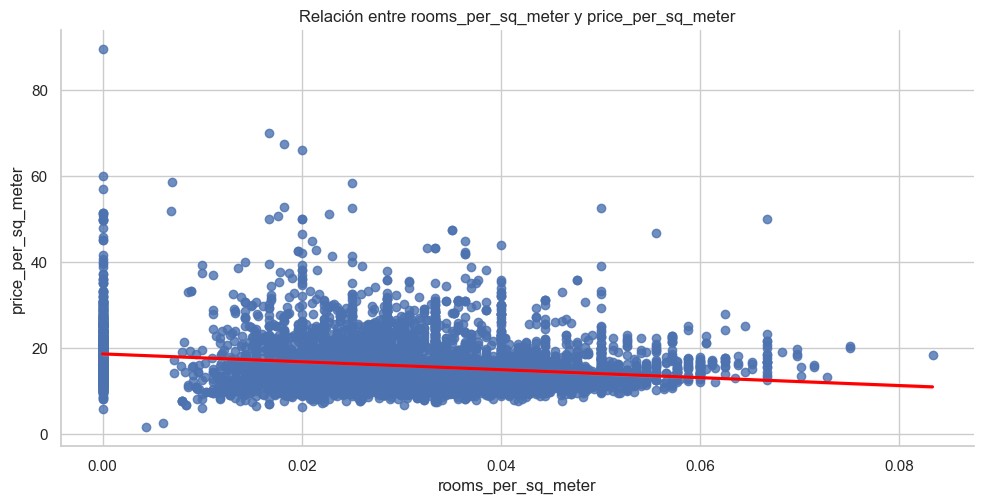

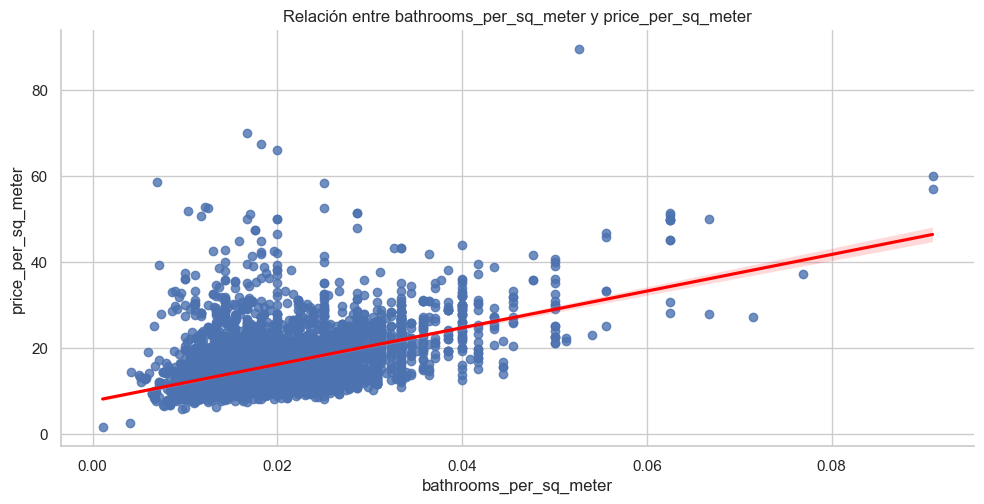

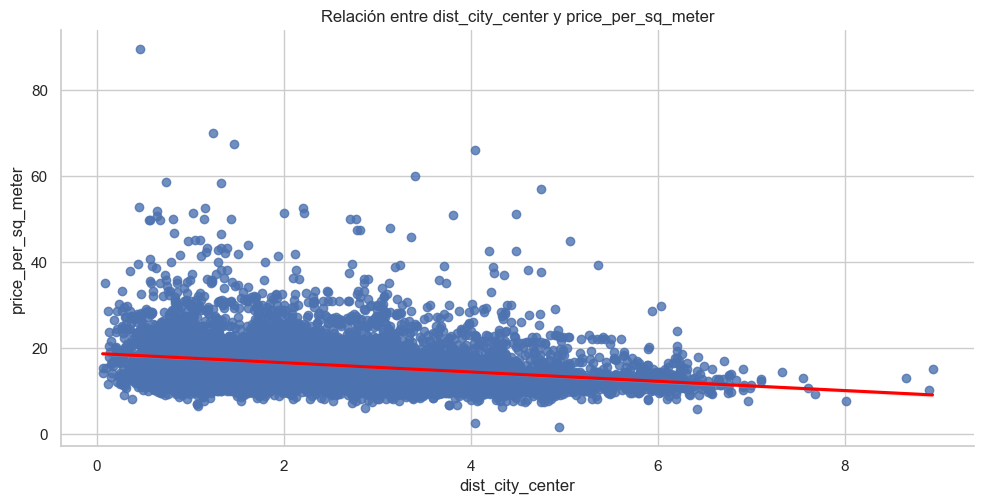

In [ ]:
# Scatter Plot con Líneas de Regresión
for feature in ['rooms_per_sq_meter', 'bathrooms_per_sq_meter', 'dist_city_center']:
    sns.lmplot(x=feature, y='price_per_sq_meter', data=rent_dataset, aspect=2, line_kws={'color': 'red'})
    plt.title(f'Relación entre {feature} y price_per_sq_meter')
    plt.show()

Seobserva una gran variabilidad en los precios que no puede explicarse solo por estas variables. Además, la dispersión de los datos indica que, si bien estas variables tienen cierto grado de relación con el precio, hay otros factores no representados en estos gráficos que también afectan significativamente al precio del alquiler por metro cuadrado.

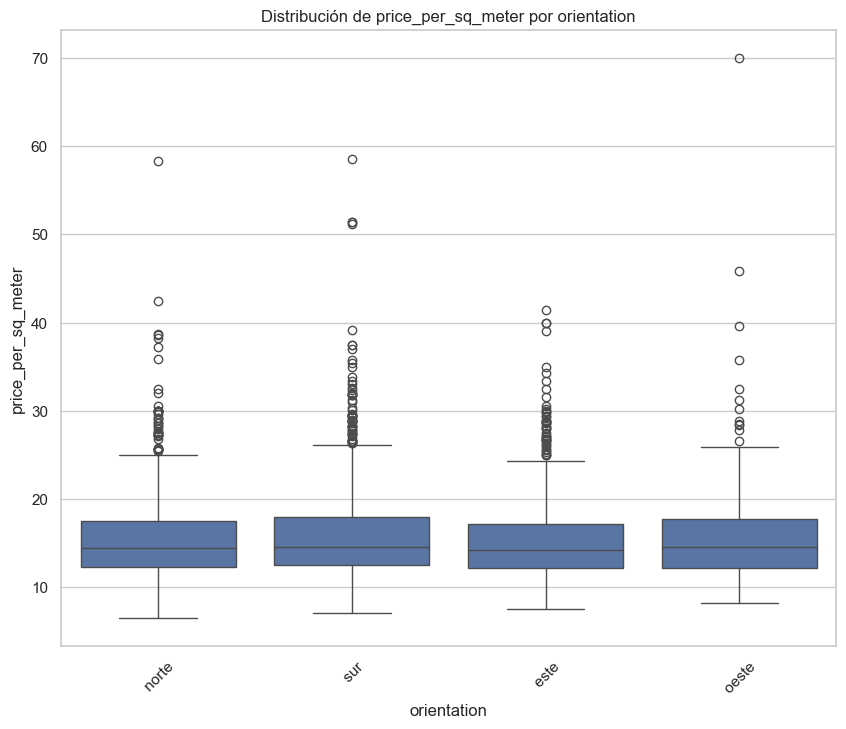

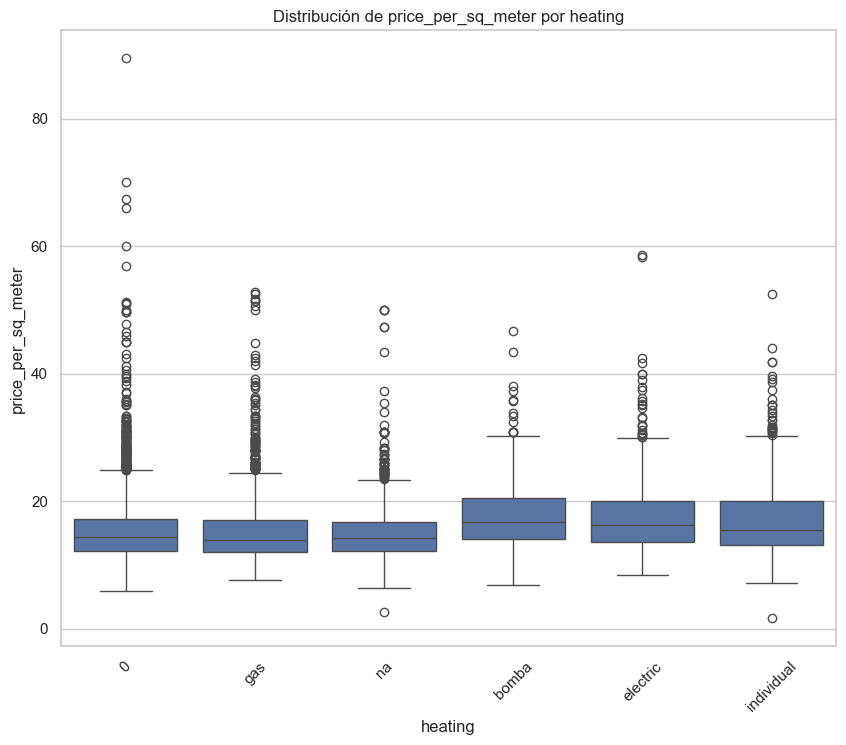

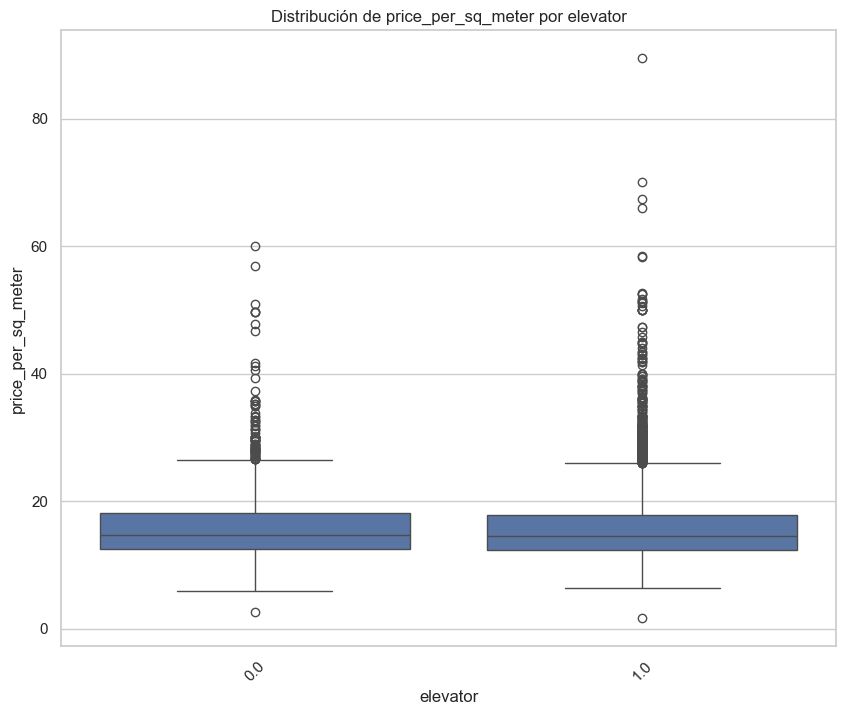

In [ ]:
# Box Plot de Variables Categóricas
for feature in ['orientation', 'heating', 'elevator']:
    plt.figure(figsize=(10, 8))
    sns.boxplot(x=feature, y='price_per_sq_meter', data=rent_dataset)
    plt.title(f'Distribución de price_per_sq_meter por {feature}')
    plt.xticks(rotation=45)
    plt.show()

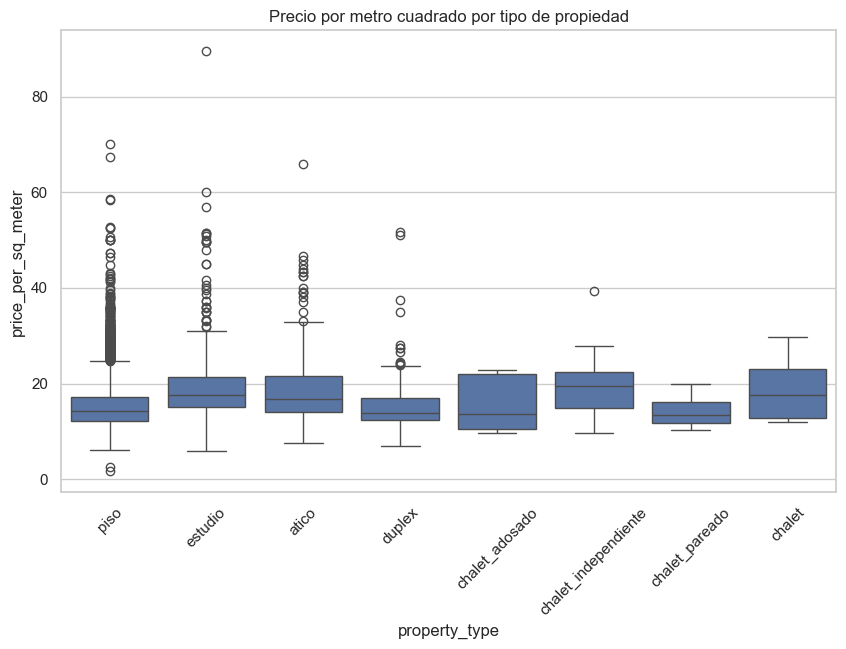

In [ ]:
# Box plot de precio por metro cuadrado por tipo de propiedad
plt.figure(figsize=(10, 6))
sns.boxplot(data=rent_dataset, x='property_type', y='price_per_sq_meter')
plt.title('Precio por metro cuadrado por tipo de propiedad')
plt.xticks(rotation=45)
plt.show()



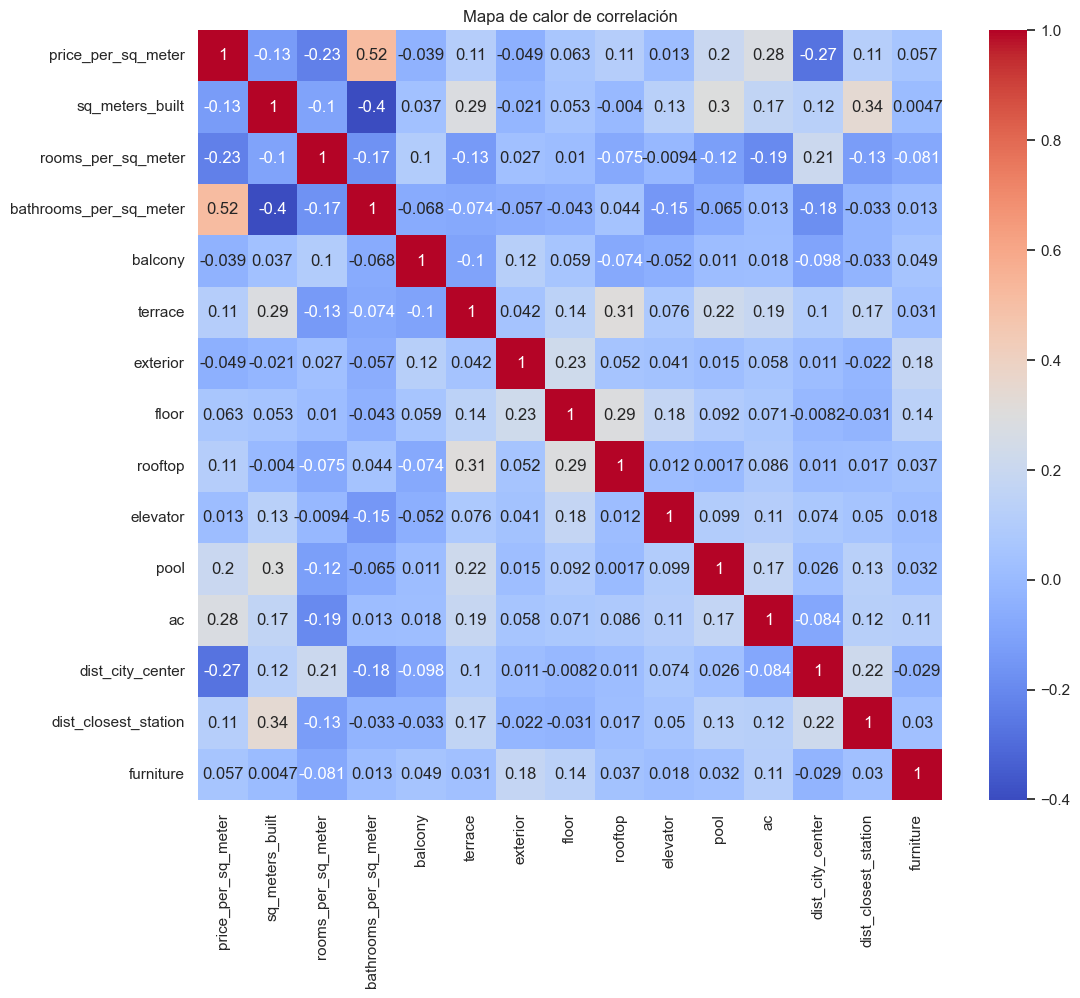

In [ ]:
# Heatmap de correlación
corr = rent_dataset.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlación')
plt.show()


Ubicación y Accesibilidad: La distancia al centro de la ciudad (dist_city_center) y la distancia a la estación más cercana (dist_closest_station) tienen correlaciones negativas modestas (-0.27 y -0.34), lo que podría reflejar una preferencia por la proximidad a centros urbanos y servicios de transporte.

Características Estructurales: La year_built tiene una correlación negativa débil con el precio por metro cuadrado (-0.023), lo que podría indicar que las propiedades más antiguas no son necesariamente más caras por metro cuadrado, o podría reflejar la modernización de propiedades más recientes.

Ausencia de Fuertes Correlaciones Positivas: No se observan correlaciones positivas fuertes con el precio por metro cuadrado, lo que sugiere que no hay una sola característica que, por sí sola, aumente significativamente el precio por metro cuadrado. Esto implica que el precio por metro cuadrado es probablemente el resultado de una combinación de factores.

# Estadísticos que nos ayuden a comprender mejor la relaciónatos:


## Análisis de Correlación

Se realizó un análisis de correlación para comprender mejor las relaciones entre diferentes variables y la variable objetivo `price_per_sq_meter`.



In [ ]:
# Asegurarse de que no hay valores no numéricos que puedan causar errores
print(rent_dataset_numeric.dtypes)

price_per_sq_meter        float64
sq_meters_built             int64
rooms_per_sq_meter        float64
bathrooms_per_sq_meter    float64
balcony                   float64
terrace                   float64
exterior                  float64
floor                     float64
rooftop                   float64
elevator                  float64
pool                      float64
ac                        float64
dist_city_center          float64
dist_closest_station      float64
dtype: object


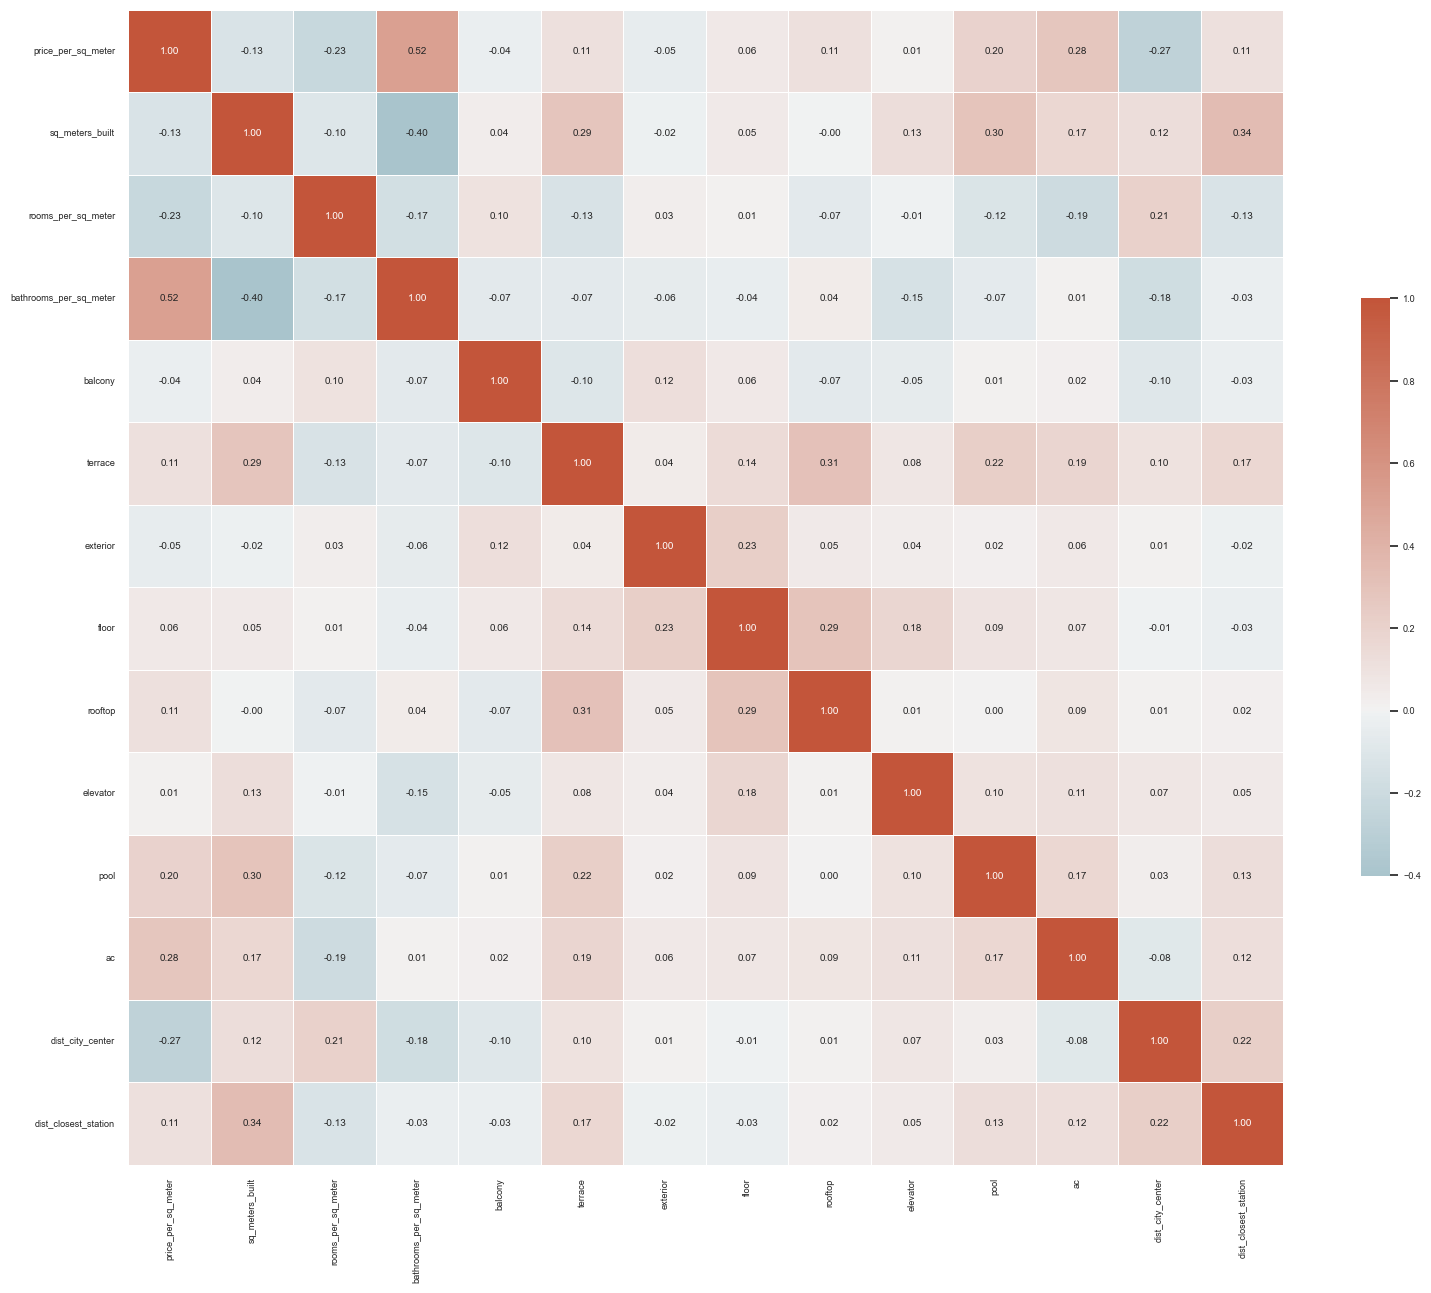

In [ ]:
plt.figure(figsize=(20, 15))  # Aumentar el tamaño del gráfico
sns.set(font_scale=0.6)  # Ajustar el tamaño de la fuente

# Calcular la matriz de correlación
correlation_matrix = rent_dataset_numeric.corr()

# Crear un mapa de colores con un rango limitado de -0.5 a 0.5
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(correlation_matrix, cmap=cmap, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()


Se realizó un análisis de correlación para comprender mejor las relaciones entre diferentes variables y la variable objetivo price_per_sq_meter. Los hallazgos clave incluyen:

- **Baños por metro cuadrado (bathrooms_per_sq_meter)**: Se observa una correlación positiva moderada con el precio por metro cuadrado, sugiriendo que los inmuebles con más baños por metro cuadrado tienden a tener precios más altos.

- **Distancia al centro de la ciudad (dist_city_center)**: Presenta una correlación negativa fuerte, indicando que cuanto más alejadas del centro están las propiedades, menor es su precio por metro cuadrado.

Este análisis de correlación nos permite identificar variables clave que podrían ser relevantes para la predicción del precio de alquiler por metro cuadrado y nos da una comprensión más profunda de la dinámica del mercado inmobiliario. Se utilizará esta información para seleccionar características para el modelado y para formular estrategias de inversión en el sector inmobiliario.


## PCA
El Análisis de Componentes Principales (PCA) es una técnica de reducción de dimensionalidad que se utiliza frecuentemente para reducir la complejidad de un conjunto de datos, manteniendo al mismo tiempo la mayor cantidad posible de información. PCA transforma las variables originales en un nuevo conjunto de variables, las componentes principales, que son ortogonales entre sí y capturan la mayor parte de la varianza en los datos.

In [ ]:
rent_dataset.isnull().sum() / len(rent_dataset)

price_per_sq_meter        0.000000
sq_meters_built           0.000000
rooms_per_sq_meter        0.000000
bathrooms_per_sq_meter    0.000000
balcony                   0.000000
terrace                   0.000000
exterior                  0.000000
orientation               0.566455
floor                     0.000000
rooftop                   0.000000
elevator                  0.000000
pool                      0.000000
ac                        0.000000
heating                   0.000000
neighborhood              0.000000
dist_city_center          0.000000
property_type             0.000235
dist_closest_station      0.000000
furniture                 0.000000
property_age_cat          0.000000
dtype: float64

In [ ]:
for cat_feature in cat_features:
    rent_dataset[cat_feature].fillna("Unknown", inplace = True)

rent_dataset.head()

price_per_sq_meter  sq_meters_built  rooms_per_sq_meter  \
0           15.454545               55            0.036364   
1           19.594595               37            0.054054   
2           13.194444               72            0.041667   
3           16.666667               45            0.022222   
4           22.000000               45            0.022222   

   bathrooms_per_sq_meter  balcony  terrace  exterior orientation  floor  \
0                0.018182      0.0      0.0       1.0       norte    2.0   
1                0.027027      1.0      0.0       1.0         sur    3.0   
2                0.013889      0.0      0.0       1.0     Unknown    4.0   
3                0.022222      1.0      0.0       1.0       norte    4.0   
4                0.022222      0.0      0.0       1.0         sur    3.0   

   rooftop  elevator  pool   ac heating                neighborhood  \
0      0.0       0.0   0.0  1.0       0                      Gràcia   
1      0.0       1.0   0.0  1.0       0  Sant Gervasi - La Bonanova   
2      0.0       1.0   0.0  1.0       0            El Baix Guinardó   
3      0.0       1.0   0.0  0.0       0  Sant Gervasi - La Bonanova   
4      0.0       1.0   0.0  0.0     gas         Sarrià-Sant Gervasi   

   dist_city_center property_type  dist_closest_station  furniture  \
0          2.026455          piso              0.094111        1.0   
1          3.582409          piso              0.902561        0.0   
2          2.663025          piso              0.188177        1.0   
3          2.910067          piso              0.892917        1.0   
4          2.727149          piso              0.293784        1.0   

  property_age_cat  
0          Unknown  
1          40 - 70  
2          Unknown  
3         70 - 120  
4          Unknown

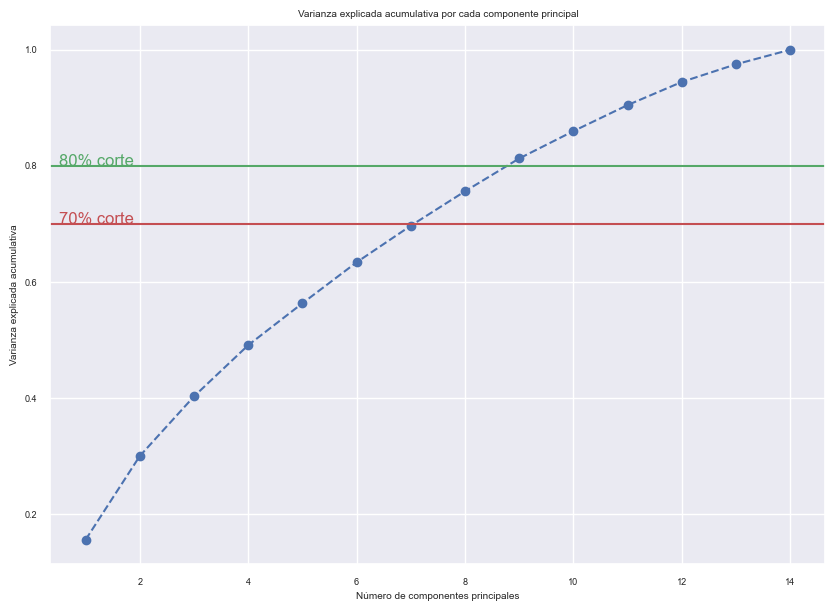

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# rent_dataset_numeric ya está definido y es el DataFrame con datos numéricos
# Excluimos cualquier variable categórica o no numérica
numeric_features = rent_dataset_numeric.select_dtypes(include=['float64', 'int64'])

# Estandarización de los datos
X_std = StandardScaler().fit_transform(numeric_features)

# Aplicación de PCA con un número de componentes que explican la mayoría de la varianza
pca = PCA().fit(X_std)

# Varianza explicada acumulativa
explained_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)

# Número de componentes
n_components = len(explained_variance_ratio_cumsum)

# Gráfico de la suma acumulativa de la varianza explicada
plt.figure(figsize=(10, 7))
plt.plot(range(1, n_components+1), explained_variance_ratio_cumsum, marker='o', linestyle='--')
plt.title('Varianza explicada acumulativa por cada componente principal')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulativa')

# Línea de corte para el 70-80% de varianza explicada
plt.axhline(y=0.7, color='r', linestyle='-')
plt.axhline(y=0.8, color='g', linestyle='-')
plt.text(0.5, 0.7, '70% corte', color = 'r', fontsize=12)
plt.text(0.5, 0.8, '80% corte', color = 'g', fontsize=12)

plt.grid(True)
plt.show()


### Análisis PCA: Varianza Explicada Acumulativa

El análisis de PCA muestra cómo las diferentes componentes principales contribuyen a la varianza total del dataset. En nuestro caso, al observar el gráfico de varianza explicada acumulativa:


- Se requieren aproximadamente **6 componentes** para explicar el 70% de la varianza, lo que podría ser suficiente para algunas aplicaciones de aprendizaje automático que requieren reducción de dimensionalidad.
- Se necesitan alrededor de **8 a 9 componentes** para capturar el 80% de la varianza, proporcionando una representación más completa del dataset original con menos variables.

Estos puntos de corte pueden orientar la selección de características y la cantidad de dimensiones a conservar para futuros modelos predictivos.


## Análisis de varianza (ANOVA)

In [ ]:
cat_features

['neighborhood',
 'property_type',
 'orientation',
 'heating',
 'property_age_cat',
 'furniture']

In [ ]:
# Test ANOVA
for cat_feature in cat_features:
    model_def = 'price_per_sq_meter ~ ' + cat_feature
    anova_model = ols(model_def, data=rent_dataset).fit()
    aov_table = sm.stats.anova_lm(anova_model, typ=2)
    print(aov_table)

                     sum_sq      df          F         PR(>F)
neighborhood   43581.246279    75.0  22.573138  4.935896e-274
Residual      216904.170688  8426.0        NaN            NaN
                      sum_sq      df          F        PR(>F)
property_type   13018.248926     8.0  55.847806  4.538113e-89
Residual       247467.168041  8493.0        NaN           NaN
                    sum_sq      df         F    PR(>F)
orientation     552.241371     4.0  4.513078  0.001215
Residual     259933.175596  8497.0       NaN       NaN
                 sum_sq      df          F        PR(>F)
heating     7454.786592     5.0  50.061818  2.756611e-51
Residual  253030.630375  8496.0        NaN           NaN
                         sum_sq      df          F        PR(>F)
property_age_cat    6601.798980     5.0  44.184721  3.721364e-45
Residual          253883.617988  8496.0        NaN           NaN
                  sum_sq      df          F        PR(>F)
furniture     833.032496     1.0  27.27

Estos resultados sugieren que todas las variables categóricas examinadas tienen algún grado de relación con el precio por metro cuadrado de alquiler, con el "Tipo de Propiedad" ,"Vecindario" y "Calefacción" mostrando las relaciones más fuertes. La transformación de estas variables categóricas en factores binarios mediante One-hot encoding y su inclusión en el modelo podría mejorar su capacidad predictiva.

# Creacion y comparacion de modelos
## Tratamiento de las variables categóricas

El siguiente análisis es útil para entender la distribución de los precios de alquiler en diferentes barrios y puede ayudarnos a identificar tendencias o patrones, como cuáles son los barrios más caros o más asequibles, y cuánta variabilidad hay en los precios dentro de cada barrio.

In [ ]:
neighborhood = rent_dataset[['neighborhood', 'price_per_sq_meter']].groupby('neighborhood', as_index=False).agg(
    # Number of instances per category
    category_count=('price_per_sq_meter', "count"),
    # Mean price
    mean_price=('price_per_sq_meter', "mean"),
    # Median price
    median_price=('price_per_sq_meter', "median"),
    # Min price
    min_price=('price_per_sq_meter', min),
    # Max price
    max_price=('price_per_sq_meter', max),
    # Standard deviation
    stantard_deviation=('price_per_sq_meter', "std")).sort_values('median_price', ascending = False).reset_index()

neighborhood.head(60)

index                                  neighborhood  category_count  \
0      30                                La Barceloneta             248   
1       6  Diagonal Mar i el Front Marítim del Poblenou              50   
2      55                                     Pedralbes              49   
3      32                        La Dreta de l'Eixample             309   
4      52                               Les Tres Torres              59   
5       5                                  Ciutat Vella             233   
6      65        Sant Pere - Santa Caterina i la Ribera             368   
7      70                           Sarrià-Sant Gervasi             124   
8      69                                        Sarrià             146   
9      61                        Sant Gervasi - Galvany             358   
10     72        Vallvidrera - El Tibidabo i les Planes               5   
11     19                                      El Gòtic             261   
12      7                                      Eixample             167   
13     62                    Sant Gervasi - La Bonanova             161   
14     74                                Vila de Gràcia             377   
15     22                                   El Poblenou             105   
16     24                                      El Raval             524   
17     29               L'Antiga Esquerra de l'Eixample             219   
18     28                                   Hostafrancs              89   
19     21               El Poble Sec - Parc de Montjuïc             206   
20     20             El Parc i la Llacuna del Poblenou              51   
21     17                                 El Fort Pienc             138   
22     41                            La Sagrada Família             220   
23     50                                     Les Corts             232   
24     63                                    Sant Martí             101   
25     39                La Nova Esquerra de l'Eixample             248   
26     59                                   Sant Antoni             150   
27     23                          El Putxet i el Farró             336   
28     11            El Camp d'En Grassot i Gràcia Nova             181   
29     68                                Sants-Montjuïc              93   
30     34                         La Font de la Guatlla              39   
31     25                                        Gràcia              93   
32     49                 La Vila Olímpica del Poblenou              20   
33     12                    El Camp de l'Arpa del Clot             178   
34     73                                        Verdun              32   
35     66                                         Sants             181   
36     67                                 Sants - Badal             106   
37     43                                      La Salut              66   
38      8                              El Baix Guinardó              97   
39     45                              La Trinitat Nova               6   
40     47                   La Vall d'Hebron - La Clota               6   
41     38                    La Maternitat i Sant Ramon              85   
42     57                       Provençals del Poblenou              38   
43      1                                      Can Baró              51   
44     15                                       El Coll              53   
45     42                                    La Sagrera             119   
46     58                                   Sant Andreu             156   
47     18                                   El Guinardó             175   
48     16                      El Congrés i els Indians              42   
49     14                                       El Clot              74   
50     31                                    La Bordeta              49   
51     10                                 El Bon Pastor              20   
52      9                    

Text(0, 0.5, 'median_price_m2')

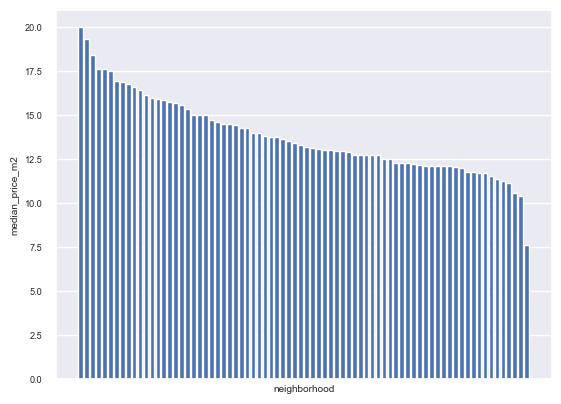

In [ ]:
plt.bar(x = 'neighborhood', height = 'median_price', data = neighborhood)
plt.xticks([])
plt.xlabel('neighborhood')
plt.ylabel('median_price_m2')

In [ ]:
# Calcula los percentiles
percentile_25 = neighborhood['median_price'].quantile(0.25)
percentile_75 = neighborhood['median_price'].quantile(0.75)


In [ ]:

def conditions(x):
    if x < percentile_25:
        return "Bajo"
    elif percentile_25 <= x < percentile_75:
        return "Medio"
    else:
        return "Alto"

# Aplicar la función a la columna 'median_price' para crear la nueva columna categórica
neighborhood['price_category'] = neighborhood['median_price'].apply(conditions)
neighborhood.head()



index                                  neighborhood  category_count  \
0     30                                La Barceloneta             248   
1      6  Diagonal Mar i el Front Marítim del Poblenou              50   
2     55                                     Pedralbes              49   
3     32                        La Dreta de l'Eixample             309   
4     52                               Les Tres Torres              59   

   mean_price  median_price  min_price  max_price  stantard_deviation  \
0   20.649810     20.000000   9.770115  51.428571            5.049292   
1   21.244049     19.352826  11.265823  51.136364            9.115582   
2   20.180308     18.421053  11.146497  44.736842            6.565534   
3   19.788803     17.661290   9.294872  89.473684            8.816217   
4   18.455873     17.647059  10.697674  39.000000            4.735454   

  price_category  
0           Alto  
1           Alto  
2           Alto  
3           Alto  
4           Alto

Ahora incluimos una nueva columna que refleja la categoría de precio de alquiler de cada propiedad basada en su barrio

In [ ]:
neighborhood_mapping = neighborhood[['neighborhood', 'price_category']]

rent_dataset = pd.merge(rent_dataset, neighborhood_mapping, on='neighborhood', how='left')

rent_dataset.head()

price_per_sq_meter  sq_meters_built  rooms_per_sq_meter  \
0           15.454545               55            0.036364   
1           19.594595               37            0.054054   
2           13.194444               72            0.041667   
3           16.666667               45            0.022222   
4           22.000000               45            0.022222   

   bathrooms_per_sq_meter  balcony  terrace  exterior orientation  floor  \
0                0.018182      0.0      0.0       1.0       norte    2.0   
1                0.027027      1.0      0.0       1.0         sur    3.0   
2                0.013889      0.0      0.0       1.0     Unknown    4.0   
3                0.022222      1.0      0.0       1.0       norte    4.0   
4                0.022222      0.0      0.0       1.0         sur    3.0   

   rooftop  ...  pool   ac  heating                neighborhood  \
0      0.0  ...   0.0  1.0        0                      Gràcia   
1      0.0  ...   0.0  1.0        0  Sant Gervasi - La Bonanova   
2      0.0  ...   0.0  1.0        0            El Baix Guinardó   
3      0.0  ...   0.0  0.0        0  Sant Gervasi - La Bonanova   
4      0.0  ...   0.0  0.0      gas         Sarrià-Sant Gervasi   

  dist_city_center  property_type dist_closest_station  furniture  \
0         2.026455           piso             0.094111        1.0   
1         3.582409           piso             0.902561        0.0   
2         2.663025           piso             0.188177        1.0   
3         2.910067           piso             0.892917        1.0   
4         2.727149           piso             0.293784        1.0   

   property_age_cat price_category  
0           Unknown          Medio  
1           40 - 70           Alto  
2           Unknown          Medio  
3          70 - 120           Alto  
4           Unknown           Alto  

[5 rows x 21 columns]

In [ ]:
cat_features.remove("neighborhood")
cat_features.append('price_category')
rent_dataset = rent_dataset.drop(['neighborhood'], axis = 1)

In [ ]:
rent_dataset.head()

price_per_sq_meter  sq_meters_built  rooms_per_sq_meter  \
0           15.454545               55            0.036364   
1           19.594595               37            0.054054   
2           13.194444               72            0.041667   
3           16.666667               45            0.022222   
4           22.000000               45            0.022222   

   bathrooms_per_sq_meter  balcony  terrace  exterior orientation  floor  \
0                0.018182      0.0      0.0       1.0       norte    2.0   
1                0.027027      1.0      0.0       1.0         sur    3.0   
2                0.013889      0.0      0.0       1.0     Unknown    4.0   
3                0.022222      1.0      0.0       1.0       norte    4.0   
4                0.022222      0.0      0.0       1.0         sur    3.0   

   rooftop  elevator  pool   ac heating  dist_city_center property_type  \
0      0.0       0.0   0.0  1.0       0          2.026455          piso   
1      0.0       1.0   0.0  1.0       0          3.582409          piso   
2      0.0       1.0   0.0  1.0       0          2.663025          piso   
3      0.0       1.0   0.0  0.0       0          2.910067          piso   
4      0.0       1.0   0.0  0.0     gas          2.727149          piso   

   dist_closest_station  furniture property_age_cat price_category  
0              0.094111        1.0          Unknown          Medio  
1              0.902561        0.0          40 - 70           Alto  
2              0.188177        1.0          Unknown          Medio  
3              0.892917        1.0         70 - 120           Alto  
4              0.293784        1.0          Unknown           Alto

In [ ]:
cat_features

['property_type',
 'orientation',
 'heating',
 'property_age_cat',
 'furniture',
 'price_category']

In [ ]:
# Mapeo de categorías para 'furniture'
mapeo_categorias = {0: "No Amueblado/Sin Info", 1: "Amueblado"}

# Reemplazar los valores en 'furniture' utilizando el mapeo de categorías
rent_dataset['furniture'] = rent_dataset['furniture'].replace(mapeo_categorias)

# Ver las primeras filas del dataframe para verificar los cambios
rent_dataset.head()


price_per_sq_meter  sq_meters_built  rooms_per_sq_meter  \
0           15.454545               55            0.036364   
1           19.594595               37            0.054054   
2           13.194444               72            0.041667   
3           16.666667               45            0.022222   
4           22.000000               45            0.022222   

   bathrooms_per_sq_meter  balcony  terrace  exterior orientation  floor  \
0                0.018182      0.0      0.0       1.0       norte    2.0   
1                0.027027      1.0      0.0       1.0         sur    3.0   
2                0.013889      0.0      0.0       1.0     Unknown    4.0   
3                0.022222      1.0      0.0       1.0       norte    4.0   
4                0.022222      0.0      0.0       1.0         sur    3.0   

   rooftop  elevator  pool   ac heating  dist_city_center property_type  \
0      0.0       0.0   0.0  1.0       0          2.026455          piso   
1      0.0       1.0   0.0  1.0       0          3.582409          piso   
2      0.0       1.0   0.0  1.0       0          2.663025          piso   
3      0.0       1.0   0.0  0.0       0          2.910067          piso   
4      0.0       1.0   0.0  0.0     gas          2.727149          piso   

   dist_closest_station              furniture property_age_cat price_category  
0              0.094111              Amueblado          Unknown          Medio  
1              0.902561  No Amueblado/Sin Info          40 - 70           Alto  
2              0.188177              Amueblado          Unknown          Medio  
3              0.892917              Amueblado         70 - 120           Alto  
4              0.293784              Amueblado          Unknown           Alto

In [ ]:
rent_dataset.isnull().sum() / len(rent_dataset)

price_per_sq_meter        0.0
sq_meters_built           0.0
rooms_per_sq_meter        0.0
bathrooms_per_sq_meter    0.0
balcony                   0.0
terrace                   0.0
exterior                  0.0
orientation               0.0
floor                     0.0
rooftop                   0.0
elevator                  0.0
pool                      0.0
ac                        0.0
heating                   0.0
dist_city_center          0.0
property_type             0.0
dist_closest_station      0.0
furniture                 0.0
property_age_cat          0.0
price_category            0.0
dtype: float64

In [ ]:
for cat_feature in cat_features:
    rent_dataset[cat_feature].fillna("Unknown", inplace = True)

rent_dataset.head()

price_per_sq_meter  sq_meters_built  rooms_per_sq_meter  \
0           15.454545               55            0.036364   
1           19.594595               37            0.054054   
2           13.194444               72            0.041667   
3           16.666667               45            0.022222   
4           22.000000               45            0.022222   

   bathrooms_per_sq_meter  balcony  terrace  exterior orientation  floor  \
0                0.018182      0.0      0.0       1.0       norte    2.0   
1                0.027027      1.0      0.0       1.0         sur    3.0   
2                0.013889      0.0      0.0       1.0     Unknown    4.0   
3                0.022222      1.0      0.0       1.0       norte    4.0   
4                0.022222      0.0      0.0       1.0         sur    3.0   

   rooftop  elevator  pool   ac heating  dist_city_center property_type  \
0      0.0       0.0   0.0  1.0       0          2.026455          piso   
1      0.0       1.0   0.0  1.0       0          3.582409          piso   
2      0.0       1.0   0.0  1.0       0          2.663025          piso   
3      0.0       1.0   0.0  0.0       0          2.910067          piso   
4      0.0       1.0   0.0  0.0     gas          2.727149          piso   

   dist_closest_station              furniture property_age_cat price_category  
0              0.094111              Amueblado          Unknown          Medio  
1              0.902561  No Amueblado/Sin Info          40 - 70           Alto  
2              0.188177              Amueblado          Unknown          Medio  
3              0.892917              Amueblado         70 - 120           Alto  
4              0.293784              Amueblado          Unknown           Alto

In [ ]:
rent_dataset.isnull().sum() / len(rent_dataset)

price_per_sq_meter        0.0
sq_meters_built           0.0
rooms_per_sq_meter        0.0
bathrooms_per_sq_meter    0.0
balcony                   0.0
terrace                   0.0
exterior                  0.0
orientation               0.0
floor                     0.0
rooftop                   0.0
elevator                  0.0
pool                      0.0
ac                        0.0
heating                   0.0
dist_city_center          0.0
property_type             0.0
dist_closest_station      0.0
furniture                 0.0
property_age_cat          0.0
price_category            0.0
dtype: float64

Este fragmento de código itera a través de cada característica categórica en nuestra lista cat_features y reemplaza cualquier valor nulo que encuentre en esas columnas con la cadena "Unknown". Esto puede ser útil para mantener la integridad de tus datos antes de realizar operaciones como One-hot encoding que veremos a continuacion

In [ ]:
rent_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8502 entries, 0 to 8501
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price_per_sq_meter      8502 non-null   float64
 1   sq_meters_built         8502 non-null   int64  
 2   rooms_per_sq_meter      8502 non-null   float64
 3   bathrooms_per_sq_meter  8502 non-null   float64
 4   balcony                 8502 non-null   float64
 5   terrace                 8502 non-null   float64
 6   exterior                8502 non-null   float64
 7   orientation             8502 non-null   object 
 8   floor                   8502 non-null   float64
 9   rooftop                 8502 non-null   float64
 10  elevator                8502 non-null   float64
 11  pool                    8502 non-null   float64
 12  ac                      8502 non-null   float64
 13  heating                 8502 non-null   object 
 14  dist_city_center        8502 non-null   

In [ ]:
# Crear el objeto OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')


for cat_feature in cat_features:
    rent_dataset[cat_feature] = rent_dataset[cat_feature].astype(str)

# Ahora puedes intentar ajustar el OneHotEncoder nuevamente
ohe.fit(rent_dataset[cat_features])


OneHotEncoder(handle_unknown='ignore')

In [ ]:
# Crear el objeto OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')

#fit
ohe = OneHotEncoder(handle_unknown = 'ignore')
ohe.fit(rent_dataset[cat_features])

#transform
df_encoded_onehot = pd.DataFrame(ohe.transform(rent_dataset[cat_features]).toarray(), columns=ohe.get_feature_names_out(cat_features))

# Eliminar las columnas categóricas del DataFrame original
rent_dataset_numeric = rent_dataset.drop(columns=cat_features, axis=1)

# Concatenar los DataFrames codificados one-hot y el original sin las columnas categóricas
rent_dataset_numeric = pd.concat([rent_dataset_numeric, df_encoded_onehot], axis=1)

rent_dataset_numeric.head()


price_per_sq_meter  sq_meters_built  rooms_per_sq_meter  \
0           15.454545               55            0.036364   
1           19.594595               37            0.054054   
2           13.194444               72            0.041667   
3           16.666667               45            0.022222   
4           22.000000               45            0.022222   

   bathrooms_per_sq_meter  balcony  terrace  exterior  floor  rooftop  \
0                0.018182      0.0      0.0       1.0    2.0      0.0   
1                0.027027      1.0      0.0       1.0    3.0      0.0   
2                0.013889      0.0      0.0       1.0    4.0      0.0   
3                0.022222      1.0      0.0       1.0    4.0      0.0   
4                0.022222      0.0      0.0       1.0    3.0      0.0   

   elevator  ...  property_age_cat_0 - 40  property_age_cat_120 - 150  \
0       0.0  ...                      0.0                         0.0   
1       1.0  ...                      0.0                         0.0   
2       1.0  ...                      0.0                         0.0   
3       1.0  ...                      0.0                         0.0   
4       1.0  ...                      0.0                         0.0   

   property_age_cat_40 - 70  property_age_cat_70 - 120  \
0                       0.0                        0.0   
1                       1.0                        0.0   
2                       0.0                        0.0   
3                       0.0                        1.0   
4                       0.0                        0.0   

   property_age_cat_Unknown  furniture_Amueblado  \
0                       1.0                  1.0   
1                       0.0                  0.0   
2                       1.0                  1.0   
3                       0.0                  1.0   
4                       1.0                  1.0   

   furniture_No Amueblado/Sin Info  price_category_Alto  price_category_Bajo  \
0                              0.0                  0.0                  0.0   
1                              1.0                  1.0                  0.0   
2                              0.0                  0.0                  0.0   
3                              0.0                  1.0                  0.0   
4                              0.0                  1.0                  0.0   

   price_category_Medio  
0                   1.0  
1                   0.0  
2                   1.0  
3                   0.0  
4                   0.0  

[5 rows x 45 columns]

In [ ]:
# Repasamos las columnas creadas
list(rent_dataset_numeric.columns)

['price_per_sq_meter',
 'sq_meters_built',
 'rooms_per_sq_meter',
 'bathrooms_per_sq_meter',
 'balcony',
 'terrace',
 'exterior',
 'floor',
 'rooftop',
 'elevator',
 'pool',
 'ac',
 'dist_city_center',
 'dist_closest_station',
 'property_type_Unknown',
 'property_type_atico',
 'property_type_chalet',
 'property_type_chalet_adosado',
 'property_type_chalet_independiente',
 'property_type_chalet_pareado',
 'property_type_duplex',
 'property_type_estudio',
 'property_type_piso',
 'orientation_ este',
 'orientation_ norte',
 'orientation_ oeste',
 'orientation_ sur',
 'orientation_Unknown',
 'heating_0',
 'heating_bomba',
 'heating_electric',
 'heating_gas',
 'heating_individual',
 'heating_na',
 'property_age_cat_+150',
 'property_age_cat_0 - 40',
 'property_age_cat_120 - 150',
 'property_age_cat_40 - 70',
 'property_age_cat_70 - 120',
 'property_age_cat_Unknown',
 'furniture_Amueblado',
 'furniture_No Amueblado/Sin Info',
 'price_category_Alto',
 'price_category_Bajo',
 'price_category_M


**Objetivos de éste punto:**

- Generar y entrenar múltiples modelos de datos y comparar los resultados obtenidos

Ahora que tenemos el dataset totalmente procesado y a punto para aplicarlo a los modelos de ML (contemplando tanto variables categóricas como numéricas), lo aplicaremos para Random Forest y Bagging empezando por este ultimo.

Hacemos split train-test de para este nuevo dataset:


In [ ]:
X = rent_dataset_numeric.drop(['price_per_sq_meter'], axis = 1)
y = rent_dataset_numeric[['price_per_sq_meter']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

## Bagging Tree

Entrenamos el modelo de Bagging con el dataset numérico extendido (gracias a One-Hot Encoding).

In [ ]:
# we enumerate the values to try
parameters = [{"max_depth":[2,3,4,5,6,7,9], "min_samples_split":[2,5,10]}]

#instantiate the classifier
decision_tree_model = DecisionTreeRegressor()

# Grid search function
grid_tree = GridSearchCV(cv = 10, estimator=decision_tree_model, param_grid=parameters, scoring="r2")
grid_tree.fit(X_train, y_train)
grid_tree.best_params_

{'max_depth': 5, 'min_samples_split': 2}

In [ ]:
max_depth = grid_tree.best_params_["max_depth"]
min_samples_split = grid_tree.best_params_["min_samples_split"]

In [ ]:
# we enumerate the values to try
parameters = {"n_estimators":[1,5,10,20,50,100,200]}

#instantiate the classifier
decision_tree_model = DecisionTreeRegressor(max_depth = max_depth, min_samples_split = min_samples_split)

#instantiate the classifier
bagging_model = BaggingRegressor(decision_tree_model)

# Grid search function
grid_bag = GridSearchCV(cv = 10,
                        estimator=bagging_model,
                        param_grid=parameters,
                        scoring="r2")
grid_bag.fit(X_train, y_train)
grid_bag.best_params_

{'n_estimators': 100}

In [ ]:
n_estimators = grid_bag.best_params_["n_estimators"]

# La función "GridSearchCV" reentrena el modelo utilizando los mejores parámetros
# encontrados (usando cross-validation) en todo el conjunto de datos de train.
best_bagging_model = grid_bag.best_estimator_

A continuación, con los parámetros óptimos del modelo, procedemos a hacer un xvalidation para entender la performance del modelo:

In [ ]:
# Creamos el modelo con los hiperpametros seleccionados en el punto anterior
bag = BaggingRegressor(DecisionTreeRegressor(max_depth = max_depth, min_samples_split = min_samples_split), n_estimators = n_estimators)
# Entrenamos el modelo con el dataset de entrenamiento mediante cross validation
bagging_cv = cross_validate(bag, X_train, y_train, cv = 10, scoring = "r2")

In [ ]:
for i, score in enumerate(bagging_cv["test_score"]):
    print(f"Accuracy for the fold no. {i} on the test set: {score}")

Accuracy for the fold no. 0 on the test set: 0.5353910258517627
Accuracy for the fold no. 1 on the test set: 0.522064256385489
Accuracy for the fold no. 2 on the test set: 0.5122589072644361
Accuracy for the fold no. 3 on the test set: 0.46497427024614235
Accuracy for the fold no. 4 on the test set: 0.5022599090347925
Accuracy for the fold no. 5 on the test set: 0.44635926232019363
Accuracy for the fold no. 6 on the test set: 0.5165954919368145
Accuracy for the fold no. 7 on the test set: 0.5352160767828347
Accuracy for the fold no. 8 on the test set: 0.5928907659047896
Accuracy for the fold no. 9 on the test set: 0.47360429554307737


{'whiskers': [<matplotlib.lines.Line2D at 0x2105f154bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x2105eb7b670>,
 'boxes': [<matplotlib.lines.Line2D at 0x2105f1569e0>],
 'medians': [<matplotlib.lines.Line2D at 0x2105eb7bb20>],
 'fliers': [<matplotlib.lines.Line2D at 0x2105eb7ac80>],
 'means': []}

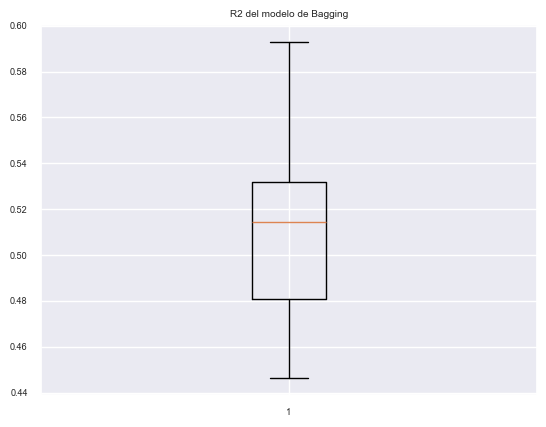

In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_title('R2 del modelo de Bagging')
ax1.boxplot(bagging_cv["test_score"])

Generamos las predicciones y calculamos el resultado de validación:

In [ ]:
y_pred_train = best_bagging_model.predict(X_train)
y_pred_test = best_bagging_model.predict(X_test)

R2 del modelo en entrenamiento:

In [ ]:
r2_train_bagging = metrics.r2_score(y_train, y_pred_train)
r2_train_bagging

0.56860612174463

R2 en validación

In [ ]:
r2_validation_bagging = metrics.r2_score(y_test, y_pred_test)
r2_validation_bagging

0.5287923994612368

Para realizar una futura comparación entre los modelos construidos, nos guardamos los resultados de las iteraciones de cross-validation en un diccionario y los resultados de validación y entrenamiento en un dataframe:

In [ ]:
# Creamos el diccionario y el DataFrame vacío
cv = {}
results = pd.DataFrame(columns=['model','mean_r2_cv_test','r2_train','r2_validation'])
# Guardamos los resultados de Bagging entrenado con el dataset reducido
cv['decision_tree_bagging'] = bagging_cv["test_score"]
model_bagging_results = ['decision_tree_bagging', np.mean(bagging_cv["test_score"]), r2_train_bagging, r2_validation_bagging]
results = pd.concat([results,pd.DataFrame([model_bagging_results], columns=results.columns)], ignore_index=True)

results

model  mean_r2_cv_test  r2_train  r2_validation
0  decision_tree_bagging         0.510161  0.568606       0.528792

La mejora en el rendimiento del segundo modelo (decision_tree_bagging) sugiere que el proceso de One-Hot Encoding de las variables categóricas y la inclusión de estas características transformadas en el modelo ha proporcionado información adicional valiosa que ayudó al modelo a aprender mejor las relaciones subyacentes en los datos.


#### Random Forest

In [ ]:
# we enumerate the values to try
parameters = {"n_estimators":[100,150,200], "max_depth": [5,10,15]}

#instantiate the classifier
rf = RandomForestRegressor()

# Grid search function
grid_rf = GridSearchCV(cv = 10, estimator=rf, param_grid=parameters, scoring="r2")
grid_rf.fit(X_train, y_train)
grid_rf.best_params_

{'max_depth': 15, 'n_estimators': 200}

In [ ]:
n_estimators = grid_rf.best_params_["n_estimators"]
max_depth = grid_rf.best_params_["max_depth"]

# La función "GridSearchCV" reentrena el modelo utilizando los mejores parámetros
# encontrados (usando cross-validation) en todo el conjunto de datos de train.
best_rf_model = grid_rf.best_estimator_

A continuación, con los parámetros óptimos del modelo, procedemos a hacer un xvalidation para entender la performance del modelo:

In [ ]:
# Creamos el modelo con los hiperpametros seleccionados en el punto anterior
rf = RandomForestRegressor(max_depth = max_depth, n_estimators = n_estimators)
# Entrenamos el modelo con el dataset de entrenamiento mediante cross validation
rf_cv = cross_validate(rf, X_train, y_train, cv = 10, scoring = "r2")

In [ ]:
for i, score in enumerate(rf_cv["test_score"]):
    print(f"Accuracy for the fold no. {i} on the test set: {score}")

Accuracy for the fold no. 0 on the test set: 0.5999994666744004
Accuracy for the fold no. 1 on the test set: 0.5945272971839927
Accuracy for the fold no. 2 on the test set: 0.6210914869429301
Accuracy for the fold no. 3 on the test set: 0.5198862721152213
Accuracy for the fold no. 4 on the test set: 0.6452089998928853
Accuracy for the fold no. 5 on the test set: 0.49050006505340316
Accuracy for the fold no. 6 on the test set: 0.5577275915379308
Accuracy for the fold no. 7 on the test set: 0.6470579516279444
Accuracy for the fold no. 8 on the test set: 0.6863501727755583
Accuracy for the fold no. 9 on the test set: 0.5675180778846165


Aunque hay variabilidad, varias de nuestras puntuaciones R² están por encima del 60%, lo que indica que en muchos casos el modelo es capaz de explicar una proporción de la variabilidad en los datos de precios de las viviendas.

{'whiskers': [<matplotlib.lines.Line2D at 0x2105e2be980>,
 'caps': [<matplotlib.lines.Line2D at 0x2105e2bebf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2105e2be200>],
 'medians': [<matplotlib.lines.Line2D at 0x2105e2bf2b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2105e2bfd00>],
 'means': []}

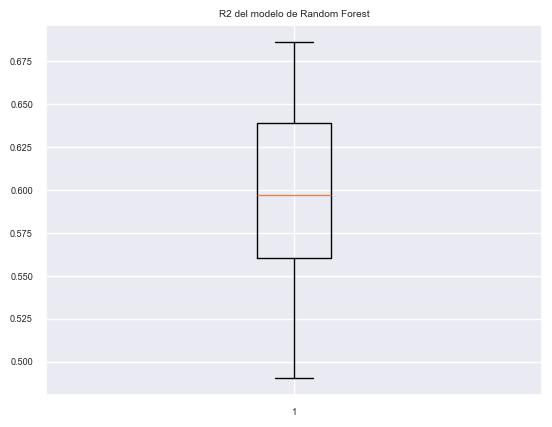

In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_title('R2 del modelo de Random Forest')
ax1.boxplot(rf_cv["test_score"])

Generamos las predicciones y calculamos el resultado de validación:

In [ ]:
y_pred_train = best_rf_model.predict(X_train)
y_pred_test = best_rf_model.predict(X_test)

R2 del modelo en entrenamiento:

In [ ]:
r2_train_rf = metrics.r2_score(y_train, y_pred_train)
r2_train_rf

0.9178311916218427

R2 en validación

In [ ]:
r2_validation_rf = metrics.r2_score(y_test, y_pred_test)
r2_validation_rf

0.6101574234509947

In [ ]:
# Guardamos los resultados de RF
cv['rf'] = rf_cv["test_score"]
model_rf_results = ['rf', np.mean(rf_cv["test_score"]), r2_train_rf, r2_validation_rf]
results = pd.concat([results,pd.DataFrame([model_rf_results], columns=results.columns)], ignore_index=True)

results

model  mean_r2_cv_test  r2_train  r2_validation
0  decision_tree_bagging         0.510161  0.568606       0.528792
1                     rf         0.592987  0.917831       0.610157

El mean_r2_cv_test de 0.592987 para Random Forest indica que aproximadamente el 59.3% de la variabilidad en el precio por metro cuadrado se puede explicar por el modelo. Es una mejora respecto al modelo de Bagging, que tenía un valor de 0.510161, indicando un 51% de explicación de la variabilidad.

El valor r2_train de 0.917831 sugiere que el modelo se ajusta muy bien a los datos de entrenamiento, lo que podría ser una señal de sobreajuste, especialmente cuando lo comparamos con el r2_validation, que es significativamente más bajo (0.610157). Esta diferencia sustancial podría indicar que el modelo no generaliza tan bien en datos no vistos.

La mejora en la métrica r2_validation de 0.610157 para Random Forest en comparación con 0.528792 para el modelo de Bagging, muestra que el Random Forest está haciendo un mejor trabajo al generalizar las predicciones a nuevos datos.

#### Comparación de modelos

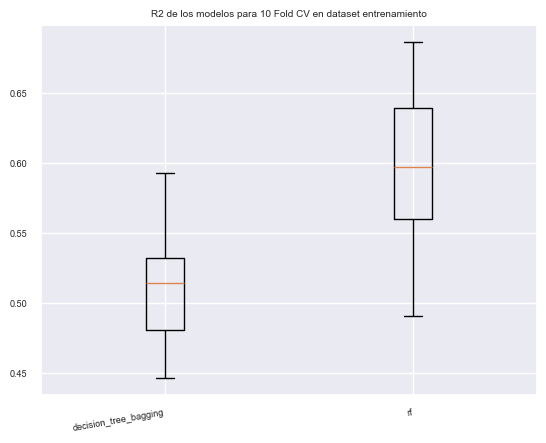

In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_title('R2 de los modelos para 10 Fold CV en dataset entrenamiento')
ax1.boxplot(pd.DataFrame(cv))
ax1.set_xticklabels(cv.keys(), rotation=10, ha="right")

plt.show()

Según el gráfico, parece que el modelo de Random Forest (rf) tiene la mediana de puntuación R² más alta, pero también tiene una variabilidad relativamente alta en comparación con el modelo decision_tree_bagging. El modelo decision_tree_bagging_reduced tiene la mediana más baja y parece ser el menos variable.

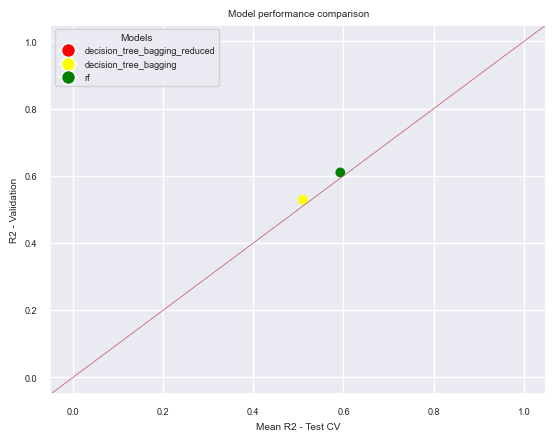

In [ ]:
colors = {'decision_tree_bagging_reduced':'red', 'decision_tree_bagging':'yellow', 'rf':'green'}
fig, ax = plt.subplots()

ax.scatter(x='mean_r2_cv_test', y = 'r2_validation', data=results, c=results['model'].map(colors))
ax.axline((0, 0), (1, 1), linewidth=0.5, color='r')
plt.title("Model performance comparison")
plt.xlabel("Mean R2 - Test CV")
plt.ylabel("R2 - Validation")

legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label=model, markerfacecolor=color, markersize=10) for model, color in colors.items()]
ax.legend(handles=legend_labels, title='Models', loc='upper left')

plt.show()

A priori el gráfico sugiere que el modelo de Random Forest puede ser el que mejor generaliza, aunque su puntuación de validación es ligeramente más baja que su rendimiento en el CV. Esto es normal y aceptable siempre que la diferencia no sea significativa, lo cual no parece ser el caso aquí. Los otros modelos muestran un comportamiento similar, lo que es un buen indicador de robustez y capacidad de generalización del modelo.

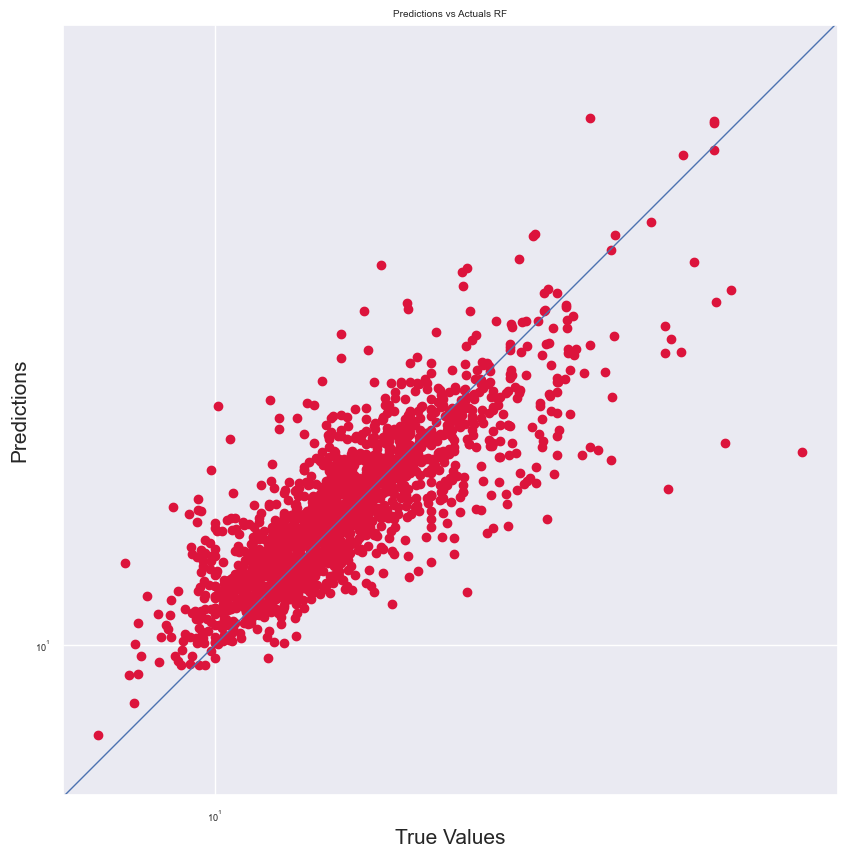

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_test, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(y_pred_test), np.max(y_test.values))
p2 = min(min(y_pred_test), np.min(y_test.values))
plt.axline((p2,p2), (p1,p1), linewidth=1, color='b')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title('Predictions vs Actuals RF')
plt.axis('equal')
plt.show()

Para valores más altos, los puntos se dispersan más lejos de la línea azul, lo que podría indicar que el modelo tiene más dificultades para predecir con precisión los precios más altos. Esto no es inusual, ya que los valores extremos a menudo tienen más variabilidad y pueden ser más difíciles de predecir.

### Boosting


- Aprender a modelar los modelos de boosting


In [ ]:
rent_dataset.head()

price_per_sq_meter  sq_meters_built  rooms_per_sq_meter  \
0           15.454545               55            0.036364   
1           19.594595               37            0.054054   
2           13.194444               72            0.041667   
3           16.666667               45            0.022222   
4           22.000000               45            0.022222   

   bathrooms_per_sq_meter  balcony  terrace  exterior orientation  floor  \
0                0.018182      0.0      0.0       1.0       norte    2.0   
1                0.027027      1.0      0.0       1.0         sur    3.0   
2                0.013889      0.0      0.0       1.0     Unknown    4.0   
3                0.022222      1.0      0.0       1.0       norte    4.0   
4                0.022222      0.0      0.0       1.0         sur    3.0   

   rooftop  elevator  pool   ac heating  dist_city_center property_type  \
0      0.0       0.0   0.0  1.0       0          2.026455          piso   
1      0.0       1.0   0.0  1.0       0          3.582409          piso   
2      0.0       1.0   0.0  1.0       0          2.663025          piso   
3      0.0       1.0   0.0  0.0       0          2.910067          piso   
4      0.0       1.0   0.0  0.0     gas          2.727149          piso   

   dist_closest_station              furniture property_age_cat price_category  
0              0.094111              Amueblado          Unknown          Medio  
1              0.902561  No Amueblado/Sin Info          40 - 70           Alto  
2              0.188177              Amueblado          Unknown          Medio  
3              0.892917              Amueblado         70 - 120           Alto  
4              0.293784              Amueblado          Unknown           Alto

Split train-test para el dataset con variables categóricas:

In [ ]:
# Importar el paquete CatBoost
import catboost as cat


In [ ]:
X = rent_dataset.drop(['price_per_sq_meter'], axis = 1)
y = rent_dataset[['price_per_sq_meter']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

CatBoost necesita que los datos de input a su modelo esten en el formato requerido por la propia librería (no acepta ni un dataframe de pandas ni un array de numpy):

In [ ]:
# create a train/test split with catboost
d_train_cat = cat.Pool(X_train, y_train, cat_features = cat_features)
d_test_cat = cat.Pool(X_test, y_test, cat_features = cat_features)

Optimizamos los parámetros de CatBoost:

In [ ]:
model = cat.CatBoostRegressor()

grid = {
    'learning_rate': [0.03, 0.015],
    'depth': [6, 8, 10, 12]
}

# Llama a grid_search sin el parámetro 'verbose' en el diccionario 'grid'
grid_search_result = model.grid_search(grid, d_train_cat, plot=True, verbose=False)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 16.3954178	test: 16.2432475	best: 16.2432475 (0)	total: 156ms	remaining: 2m 35s
1:	learn: 15.9626970	test: 15.8071835	best: 15.8071835 (1)	total: 183ms	remaining: 1m 31s
2:	learn: 15.5366608	test: 15.3776252	best: 15.3776252 (2)	total: 216ms	remaining: 1m 11s
3:	learn: 15.1251189	test: 14.9610354	best: 14.9610354 (3)	total: 249ms	remaining: 1m 2s
4:	learn: 14.7227866	test: 14.5535227	best: 14.5535227 (4)	total: 281ms	remaining: 55.8s
5:	learn: 14.3371004	test: 14.1599461	best: 14.1599461 (5)	total: 314ms	remaining: 52s
6:	learn: 13.9654646	test: 13.7829842	best: 13.7829842 (6)	total: 353ms	remaining: 50.1s
7:	learn: 13.6036192	test: 13.4225665	best: 13.4225665 (7)	total: 390ms	remaining: 48.3s
8:	learn: 13.2472451	test: 13.0654286	best: 13.0654286 (8)	total: 423ms	remaining: 46.6s
9:	learn: 12.9079913	test: 12.7207338	best: 12.7207338 (9)	total: 458ms	remaining: 45.3s
10:	learn: 12.5849382	test: 12.3920397	best: 12.3920397 (10)	total: 492ms	remaining: 44.3s
11:	learn: 12.2614

Mejor combinación de parámetros:

In [ ]:
grid_search_result['params']

{'depth': 10, 'learning_rate': 0.03}

Los resultados del grid search indican que los hiperparámetros que dan lugar a mejores predicciones para el set de test son: depth = 10, learning_rate = 0.03 y iterarions = 610. Observando la gráfica donde se compara el RMSE para los datos de test y train se puede apreciar que hay otro mínimo en los datos de test (correspondiente a depth = 8 y learning_rate = 0.03) que está muy cerca del otro. La diferencia entre los dos mínimos en cuanto al valor del RMSE es de solamente 0.01. Para construir el modelo nos quedaremos con los hiperparámetros correspondientes al mínimo local (con depth = 8 y learning_rate = 0.03) debido que la diferencia de RMSE entre los datos test y train es menor para este, es decir, hay menos sobreentrenamiento.

Procedemos a validar el modelo con cross-validation con los datos de entrenamiento:

In [ ]:
# Model cross validation
params = {"iterations": 1800
          , "depth": 8
          , "loss_function": "RMSE"
          , "learning_rate": 0.03
          , "verbose": False
          , "subsample": 0.7}

scores = cat.cv(d_train_cat
            , params
            , fold_count = 10
            , plot = "True")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/10]

bestTest = 3.20333539
bestIteration = 1491

Training on fold [1/10]

bestTest = 4.191334349
bestIteration = 1797

Training on fold [2/10]

bestTest = 3.065350388
bestIteration = 1769

Training on fold [3/10]

bestTest = 3.642535335
bestIteration = 1670

Training on fold [4/10]

bestTest = 3.231090605
bestIteration = 1535

Training on fold [5/10]

bestTest = 3.479057412
bestIteration = 1456

Training on fold [6/10]

bestTest = 2.955967006
bestIteration = 1787

Training on fold [7/10]

bestTest = 3.605572741
bestIteration = 1709

Training on fold [8/10]

bestTest = 2.79503063
bestIteration = 1795

Training on fold [9/10]

bestTest = 3.261803763
bestIteration = 1784



El pliegue 7, con un bestTest de 990.91, destaca por tener un error significativamente más alto que los otros pliegues. Esto podría ser indicativo de un outlier o de un segmento de los datos que es particularmente difícil de predecir para el modelo.

En este paso estamos configurando y entrenando un modelo de regresión usando CatBoost con los parámetros seleccionados a partir de nuestro proceso de optimización y validación previo. Los parámetros incluyen el número de iteraciones (iterations = 540), lo que se basa en nuestro análisis anterior para prevenir el sobreentrenamiento, la tasa de aprendizaje (learning_rate = 0.03), y la profundidad de los árboles (depth = 8). El parámetro subsample=0.7 indica que cada árbol se entrena con una submuestra aleatoria del 70% de los datos, lo que ayuda a evitar el sobreajuste y añade más aleatoriedad al proceso de entrenamiento.

In [ ]:
model_cat = cat.CatBoostRegressor(iterations = 540
                                  , learning_rate = 0.03
                                  , loss_function = "RMSE"
                                  , random_seed = 12345
                                  , depth = 8
                                  , subsample=0.7)

model_cat.fit(d_train_cat
                , eval_set = d_test_cat
                , verbose_eval=500
                , plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 5.4161865	test: 5.6425182	best: 5.6425182 (0)	total: 65.6ms	remaining: 35.4s
500:	learn: 2.8083274	test: 3.4548593	best: 3.4543504 (498)	total: 25.9s	remaining: 2.02s
539:	learn: 2.7650981	test: 3.4435233	best: 3.4435141 (538)	total: 28.1s	remaining: 0us

bestTest = 3.443514061
bestIteration = 538

Shrink model to first 539 iterations.


Hacemos predicciones en train y test:

In [ ]:
# Predicción con los datos train
y_pred_train = model_cat.predict(X_train)
r2_train_cat = metrics.r2_score(y_train, y_pred_train)

# Predicción con los datos train
y_pred_test = model_cat.predict(X_test)
r2_test_cat = metrics.r2_score(y_test, y_pred_test)

print('R2 para la predicción con los datos train: ', r2_train_cat)
print('R2 para la predicción con los datos test: ', r2_test_cat)

R2 para la predicción con los datos train:  0.7362295274649632
R2 para la predicción con los datos test:  0.6371856166244972


 En el conjunto de entrenamiento, el R^2 es bastante alto (0.935205), indicando un buen ajuste, pero en el conjunto de validación, el rendimiento cae a 0.821968, lo que podría indicar un sobreajuste cuando se compara con el desempeño en el conjunto de entrenamiento.

In [ ]:
# Guardamos los resultados de RF
model_catboost_results = ['catboost', np.nan, r2_train_cat, r2_test_cat]
results = pd.concat([results,pd.DataFrame([model_catboost_results], columns=results.columns)], ignore_index=True)

results

model  mean_r2_cv_test  r2_train  r2_validation
0  decision_tree_bagging         0.510161  0.568606       0.528792
1                     rf         0.592987  0.917831       0.610157
2               catboost              NaN  0.736230       0.637186

Los modelos muestran un rendimiento medio en general, con el modelo Random Forest como el más fuerte en el conjunto de validación. Sin embargo, la diferencia entre el rendimiento de entrenamiento y validación para el modelo CatBoost y RF sugiere que esta sobreajustado. Esto podría ser debido a que el modelo aprende demasiado de los datos de entrenamiento, reduciendo su capacidad para generalizar a nuevos datos.

#### Feature importance

In [ ]:
cat_importance = pd.DataFrame({"Features": model_cat.feature_names_
                               , "Importance": model_cat.feature_importances_}
                             ).sort_values('Importance', ascending=False)
cat_importance

Features  Importance
0          sq_meters_built   23.505785
11                      ac   10.396948
18          price_category   10.034653
2   bathrooms_per_sq_meter    9.597587
13        dist_city_center    8.772258
10                    pool    8.315778
15    dist_closest_station    5.092582
7                    floor    4.683778
12                 heating    3.442574
17        property_age_cat    3.086817
9                 elevator    2.870049
5                 exterior    2.439420
4                  terrace    2.410592
1       rooms_per_sq_meter    2.198735
6              orientation    1.323713
14           property_type    0.776413
16               furniture    0.561677
3                  balcony    0.280789
8                  rooftop    0.209852

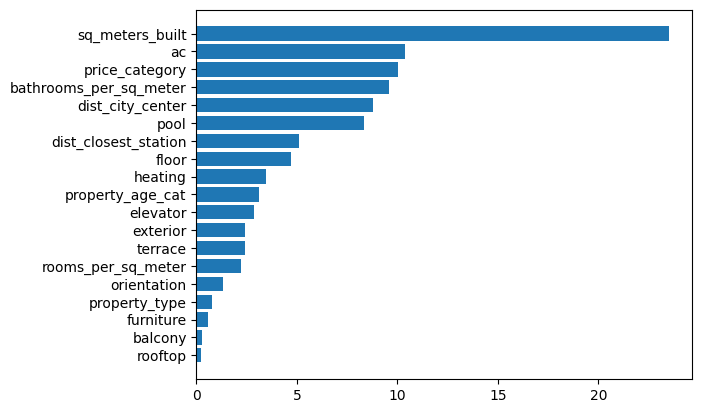

In [ ]:
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(y = 'Features'
        , width = 'Importance'
        , data = cat_importance)
ax.invert_yaxis()  # labels read top-to-bottom

#### Importancia de las Características en el Modelo CatBoost

El gráfico de importancia de las características proporciona información valiosa sobre las variables que más influyen en la predicción del precio de alquiler en nuestro modelo CatBoost. Aquí están las conclusiones clave:

- sq_meters_built: Esta característica es la más influyente, destacando la importancia del tamaño de la propiedad en la determinación del precio de alquiler.

- pool, dist_city_center, neighborhood_rent_index: Siguen en importancia, pero su impacto es significativamente menor en comparación con sq_meters_built.

- Características como rooftop, property_type, y balcony: Están en la parte inferior del gráfico, lo que indica que tienen poca o ninguna influencia en la predicción del precio de alquiler en el modelo actual.
al modelo.


#### Evaluación del modelo

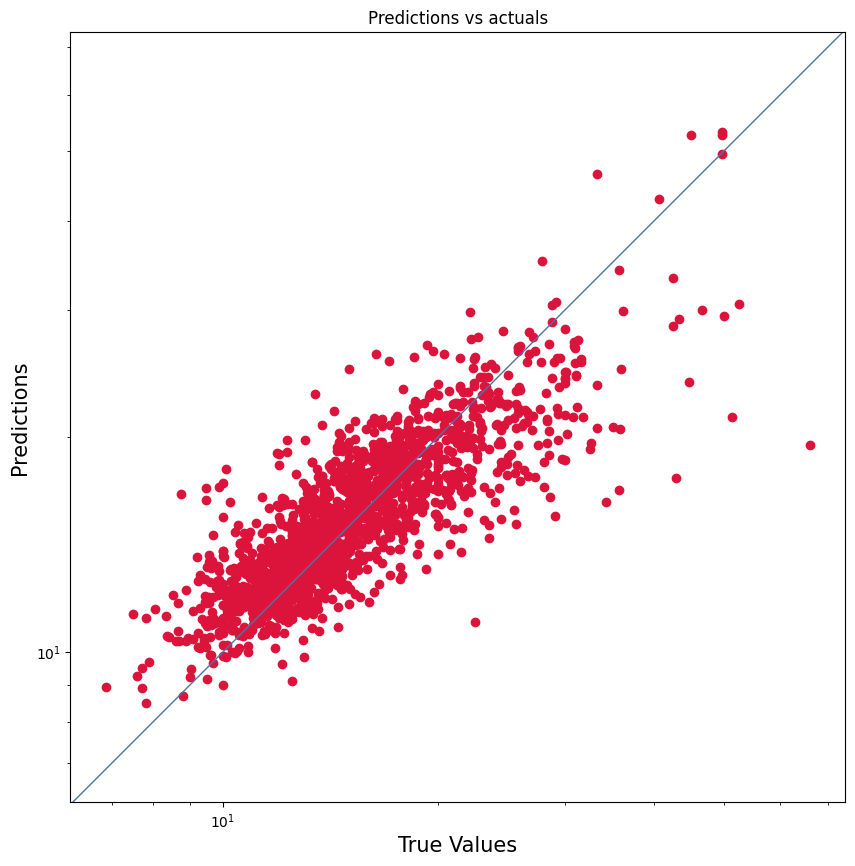

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_test, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(y_pred_test), np.max(y_test.values))
p2 = min(min(y_pred_test), np.min(y_test.values))
plt.axline((p2,p2), (p1,p1), linewidth=1, color='b')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title('Predictions vs actuals')
plt.axis('equal')
plt.show()

El modelo de CatBoost demostró ser prometedor para predecir el precio de alquiler por metro cuadrado. A pesar de esto, es crucial abordar la incertidumbre asociada con el valor NaN en la cross-validation antes de considerar su uso en aplicaciones del mundo real.

Las mejoras podrían incluir una investigación más profunda sobre la ingeniería de características, la experimentación con diferentes métodos de preprocesamiento de datos y la consideración de un rango más amplio de modelos y técnicas de ensamble.

El desafío de asegurar que un modelo complejo como CatBoost no esté sobreajustado también debe abordarse, tal vez mediante la introducción de métodos de regularización más fuertes o el ajuste más fino de sus hiperparámetros.


# Shap values


In [ ]:
# Representaciones Shap Values
import shap
# print the JS visualization code to the notebook
shap.initjs()

#Recuperamos el dataset que hemos utilizado para Catboost (con valores categóricos), utilizando el mismo "Random State"
X = rent_dataset.drop(['price_per_sq_meter'], axis = 1)
y = rent_dataset[['price_per_sq_meter']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Cálculo Shap Values
explainer_cat = shap.TreeExplainer(model_cat)
shap_values_cat = explainer_cat.shap_values(X_train)

In [ ]:
print("Attributes")
print("")
print(X_train.iloc[0,:])
print("")
print("Price")
print("")
print(y_train.iloc[0,0])

Attributes

sq_meters_built                  80
rooms_per_sq_meter            0.025
bathrooms_per_sq_meter       0.0125
balcony                         0.0
terrace                         0.0
exterior                        1.0
orientation                   oeste
floor                           0.0
rooftop                         0.0
elevator                        1.0
pool                            0.0
ac                              0.0
heating                          na
dist_city_center           2.283619
property_type                  piso
dist_closest_station        0.52097
furniture                 Amueblado
property_age_cat            40 - 70
price_category                 Alto
Name: 1487, dtype: object

Price

10.375




Esta información nos proporciona una referencia para el análisis posterior de cómo cada característica influye en el modelo al realizar predicciones sobre el precio de alquiler.


In [ ]:
print("CATBoost Shap visualization for instance 0")
shap.force_plot(explainer_cat.expected_value, shap_values_cat[0,:], X_train.iloc[0,:])

CATBoost Shap visualization for instance 0



La visualización de SHAP ilustra cómo cada característica contribuye a la predicción final del modelo para una instancia concreta.
En este caso, el valor de la predicción es mayor que el valor base, lo que significa que las características mostradas en rojo contribuyen a aumentar la predicción del precio por metro cuadrado de la propiedad, mientras que las características en azul contribuyen a disminuirlo.

Por ejemplo, si "elevator = 1" está en rojo y tiene una barra larga, significa que la presencia de un ascensor tiene un efecto significativo en el aumento del precio por metro cuadrado predicho por el modelo para esa instancia específica. Similarmente, "sq_meters_built = 80" en rojo indica que la superficie construida contribuye positivamente al precio por metro cuadrado, quizás porque una mayor superficie construida generalmente lleva a un mayor precio de alquiler.el futuro.


In [ ]:
shap.force_plot(explainer_cat.expected_value, shap_values_cat[0:1000], X_train[0:1000])

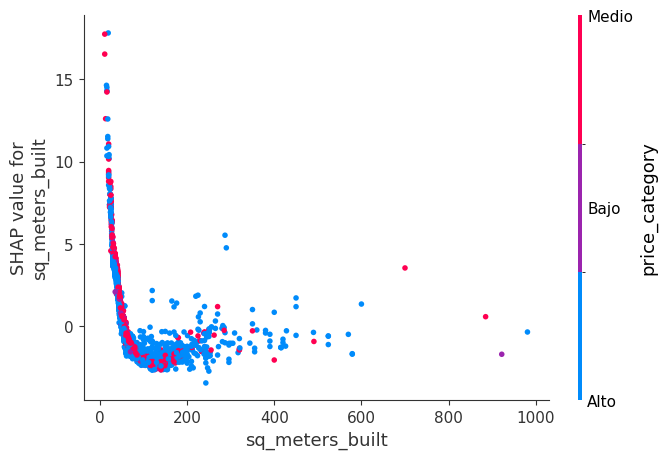

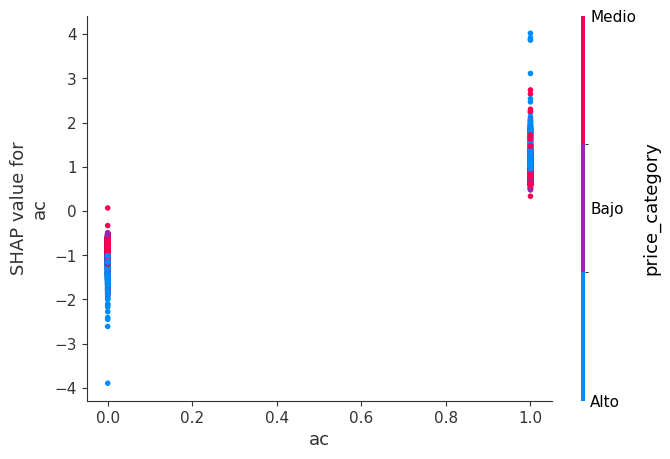

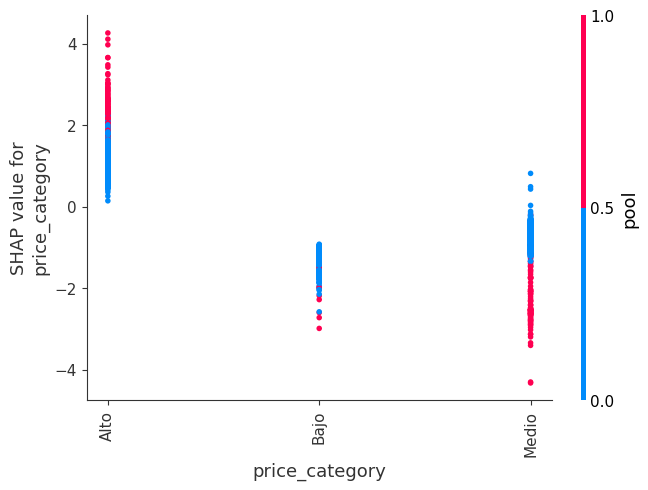

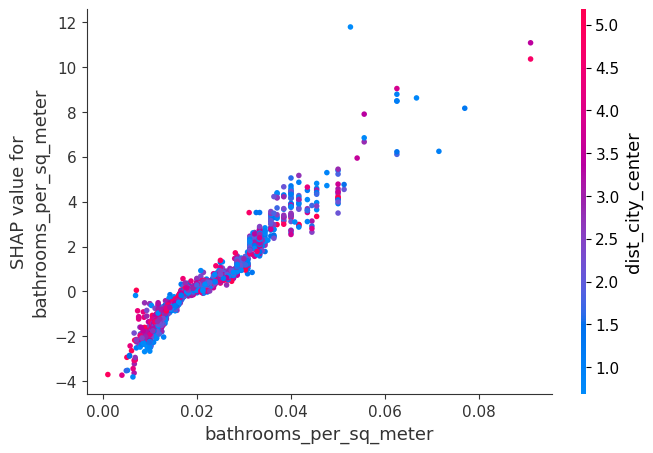

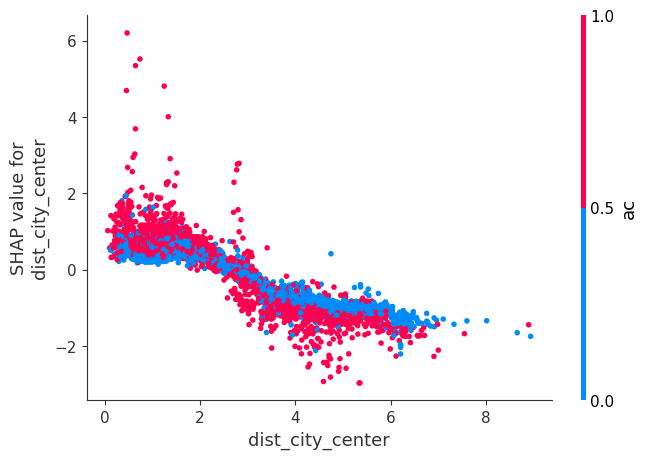

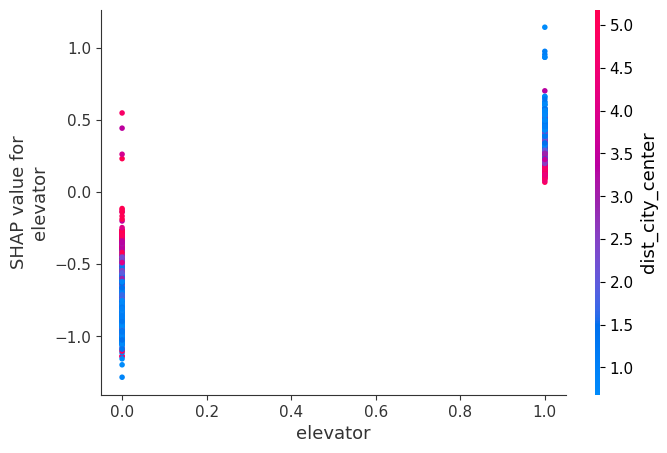

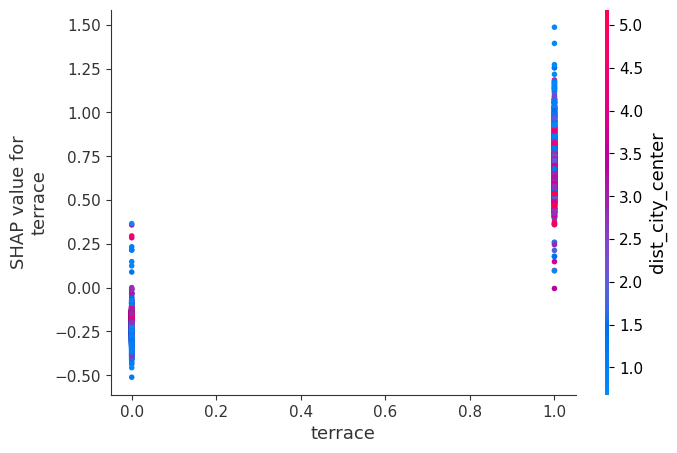

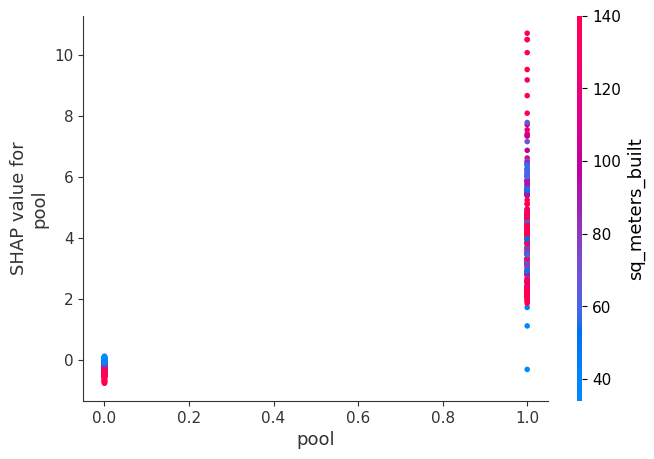

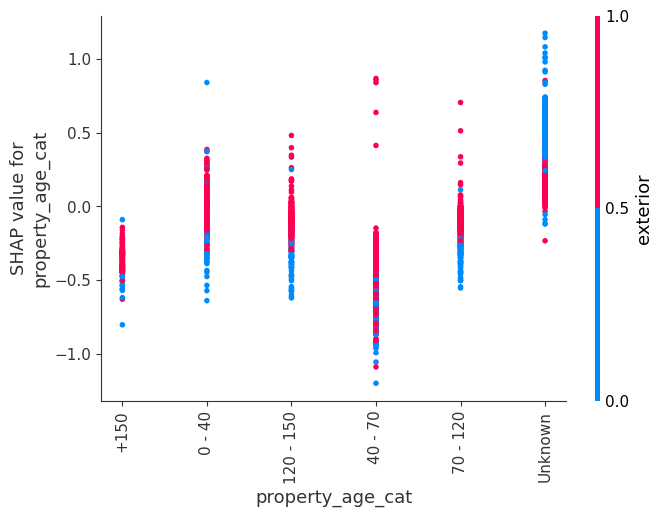

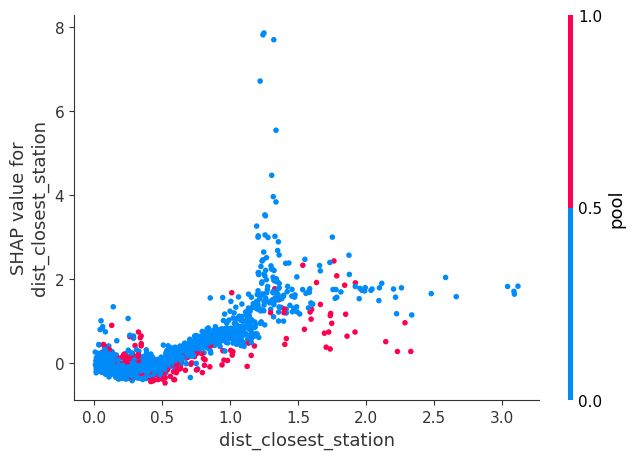

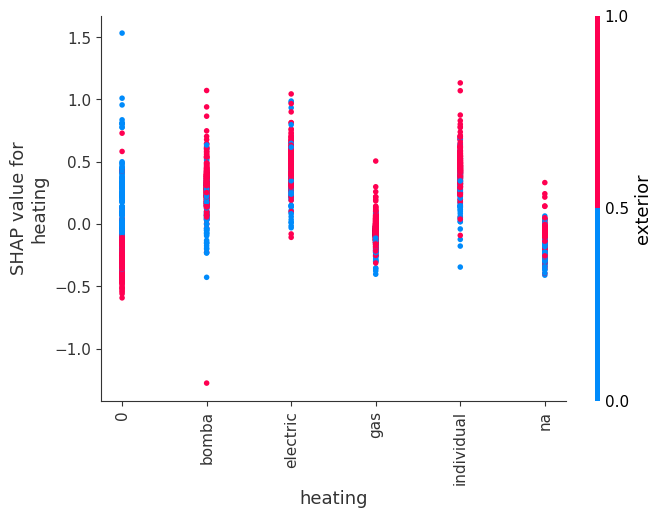

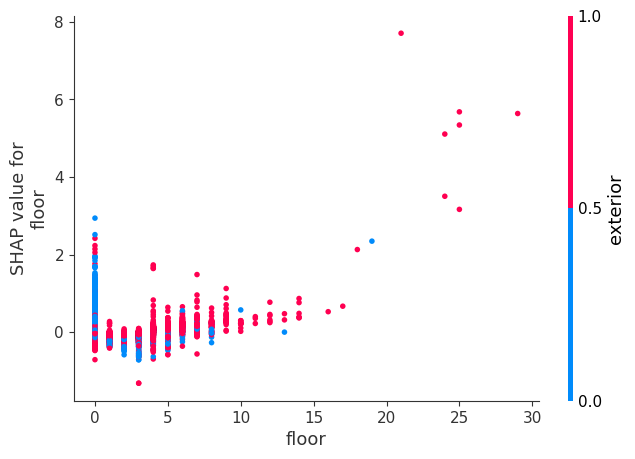

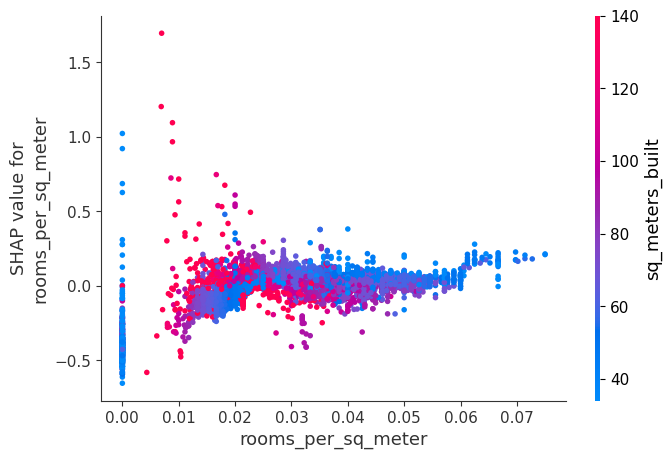

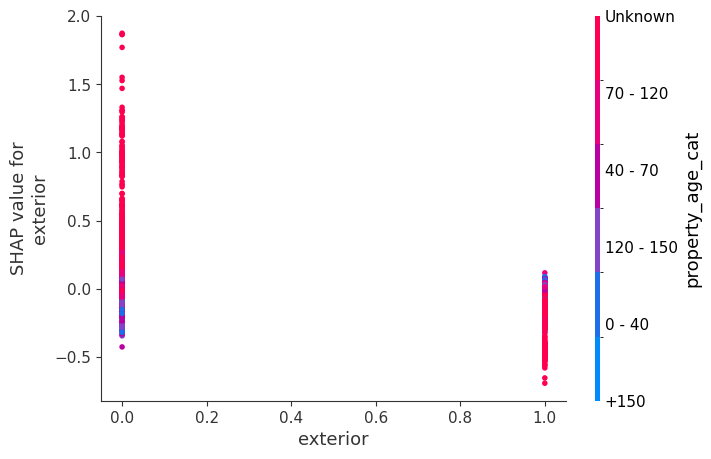

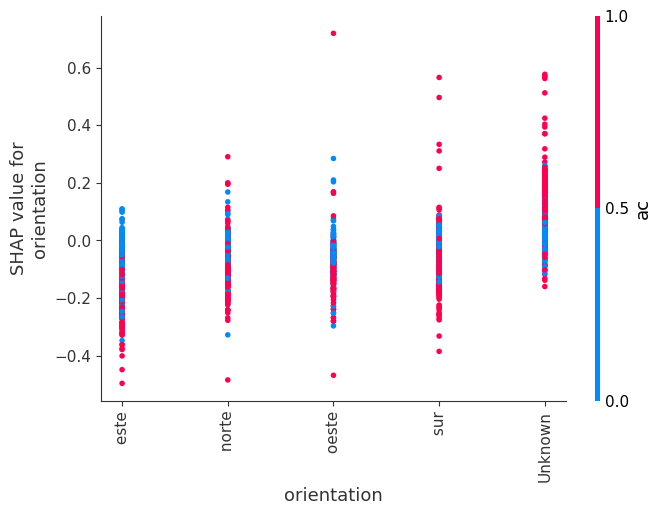

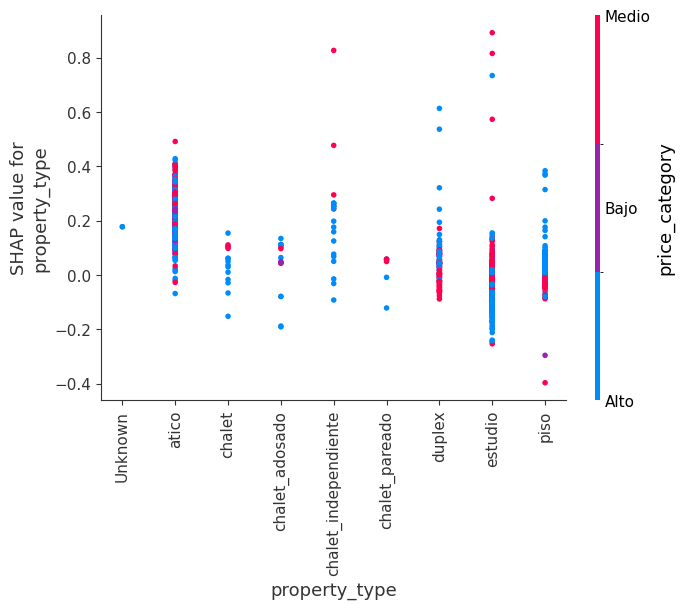

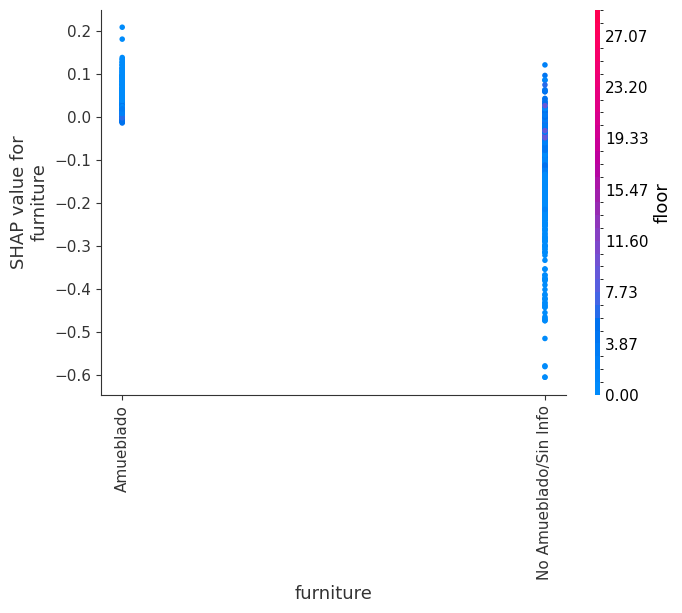

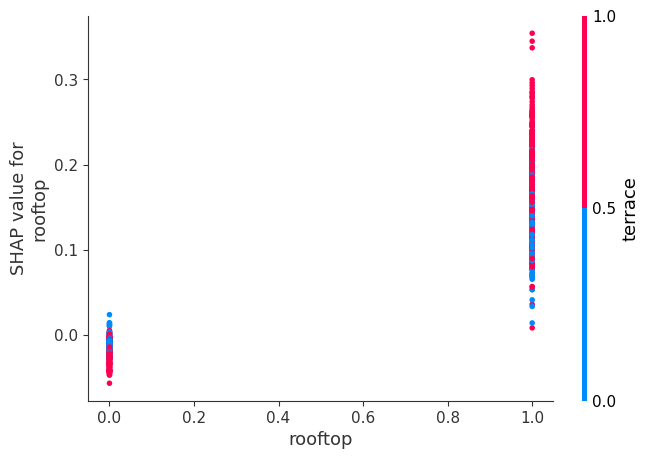

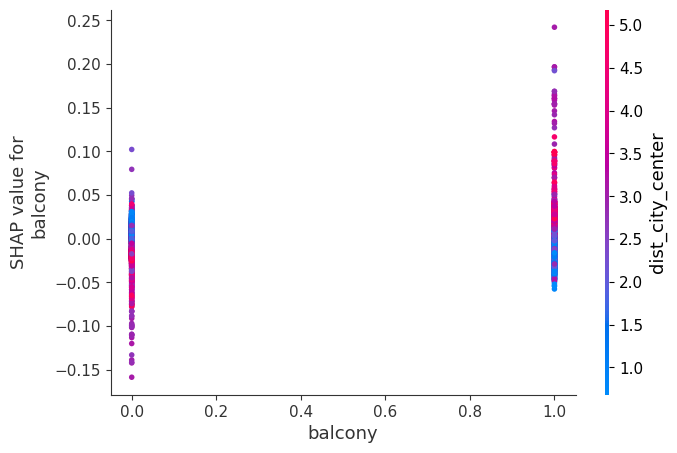

In [ ]:
top_inds = np.argsort(-np.sum(np.abs(shap_values_cat), 0))

for i in range(0,len(top_inds)):
    shap.dependence_plot(top_inds[i], shap_values_cat, X_train)

--

Resultados finales, conclusiones y vias abiertasción

El proyecto se centró en la creación de modelos predictivos para estimar el precio de alquiler por metro cuadrado en Barcelona, reconociendo la influencia significativa del tamaño de la vivienda en el precio de alquiler. Se propuso una serie de modelos para predecir esta nueva variable objetivo.

## Análisis exploratorio y limpieza de instancias

### Carga y exploración inicial de datos

Se inició con la carga del dataset de alquiler de viviendas en Barcelona, identificando las características principales y la presencia de valores faltantes o anomalías.

### Creación de la variable objetivo

Se generó una nueva variable, `price_per_sq_meter`, dividiendo el precio de alquiler por los metros cuadrados construidos. Además, se normalizaron las variables de número de habitaciones y baños respecto a los metros cuadrados.

### Estadística descriptiva

Se realizó un análisis estadístico descriptivo para obtener una comprensión general de los datos, incluyendo medidas de tendencia central y dispersión para las variables numéricas.

### Visualizaciones

Se crearon diversas visualizaciones para examinar la distribución de las variables y la relación entre las características y la variable objetivo. Estas incluyeron histogramas, gráficos de dispersión y mapas de calor de correlación.

### Análisis estadístico

Se emplearon técnicas estadísticas como PCA y ANOVA para investigar más a fondo las relaciones entre las variables y la variable objetivo.

## Creación y comparación de modelos

### Preprocesamiento de datos

Se prepararon los datos para el modelado, incluyendo la imputación de valores faltantes, la normalización de variables y la codificación de variables categóricas mediante One-Hot Encoding.

### Modelos implementados

Se desarrollaron y compararon varios modelos, incluyendo:

- **Modelo de Bagging**: Se utilizó un enfoque de Bagging Trees, optimizando los hiperparámetros mediante búsqueda en cuadrícula y validando el modelo con 10 Fold Cross Validation.
  
- **Random Forest**: Se aplicó un modelo de Random Forest, siguiendo un proceso similar de optimización de hiperparámetros y validación.
  
- **Boosting (CatBoost)**: Se seleccionó CatBoost como el modelo de Boosting, realizando también una optimización de hiperparámetros y evaluando el modelo con Cross Validation.

Cada modelo se evaluó en base a la métrica R2, tanto en el conjunto de entrenamiento como en el de validación.

## Análisis de Shap Values

Para el modelo de CatBoost, se realizó un análisis detallado de los Shap Values para interpretar la influencia de las distintas características en las predicciones del modelo. Se exploraron tanto los efectos individuales como los globales de las características.

## Resultados finales y conclusiones

El modelo de Random Forest mostró el mejor rendimiento en términos de R2, indicando una capacidad moderada para predecir el precio de alquiler por metro cuadrado. Sin embargo, se identificaron limitaciones relacionadas con la calidad de los datos, la distribución de las variables y la complejidad del modelo. Se discutieron posibles mejoras y se evaluó la aplicabilidad del modelo en contextos reales.

Se concluyó que, a pesar de las limitaciones y desafíos, los modelos desarrollados ofrecen una base prometedora para la predicción del precio de alquiler por metro cuadrado en Barcelona.